# Temperature Forecast Project using ML

## Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [63]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

We see that in our dataset there are a total of 7752 rows and 25 columns present. We see that right now all the information shown above is in numerical format and has no text data but we will need to investigate on it further. Also the problem statement says that we are suppose to predict two label columns namely "Next_Tmax" and "Next_Tmin". These target labels contain all continous data values in them so it makes this to be a Regression problem.

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
df.shape

(7752, 25)

In [6]:
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

### Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Using the info method we can see that there is only 1 column with object datatype and remaining 24 columns have float datatype values in them. The column which shows object datatype is actually for "Date" and we will have to treat it and convert it into numerical format. And as we can see that the null values present are very less compared to non null values so we will drop them       

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date', axis=1, inplace=True)
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

    Day  Month    Year  
0  30.0    6.0  2013.0  
1  30.0    6.0  2013.0  
2  30.0    6.0  2013.0  
3  30.0    6.0  2013.0  
4  30.0    6.0  2013.0  

[5 rows x 27 columns]

We have splitted the Date column into day, month and year for visualisation purposes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


here all the have converted into respected formate

## checking null values

In [10]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

The isnull method along with the sum function gives us the details on the missing values. In the above cell we can see that most of the columns have null values present in them that will need to be deal with.

### % of Null value present in the dataset

In [11]:
n=(df.isnull().sum()/(len(df)))*100
np.round(n,4)

station             0.0258
Present_Tmax        0.9030
Present_Tmin        0.9030
LDAPS_RHmin         0.9675
LDAPS_RHmax         0.9675
LDAPS_Tmax_lapse    0.9675
LDAPS_Tmin_lapse    0.9675
LDAPS_WS            0.9675
LDAPS_LH            0.9675
LDAPS_CC1           0.9675
LDAPS_CC2           0.9675
LDAPS_CC3           0.9675
LDAPS_CC4           0.9675
LDAPS_PPT1          0.9675
LDAPS_PPT2          0.9675
LDAPS_PPT3          0.9675
LDAPS_PPT4          0.9675
lat                 0.0000
lon                 0.0000
DEM                 0.0000
Slope               0.0000
Solar radiation     0.0000
Next_Tmax           0.3483
Next_Tmin           0.3483
Day                 0.0258
Month               0.0258
Year                0.0258
dtype: float64

<AxesSubplot:>

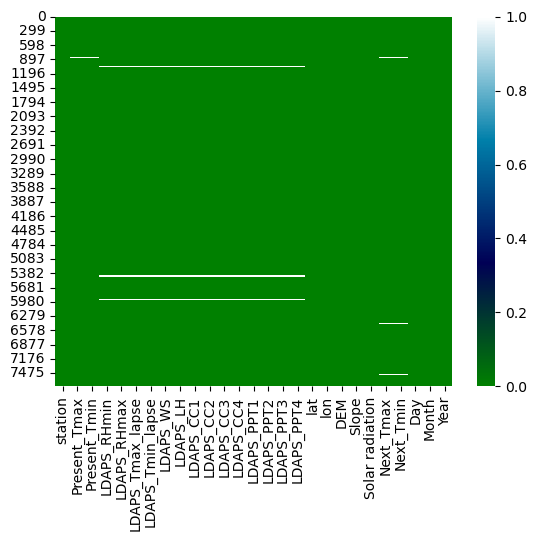

In [12]:
sns.heatmap(df.isnull(),cmap='ocean')

the white line meant there is missing value in the dataset at their position

<AxesSubplot:>

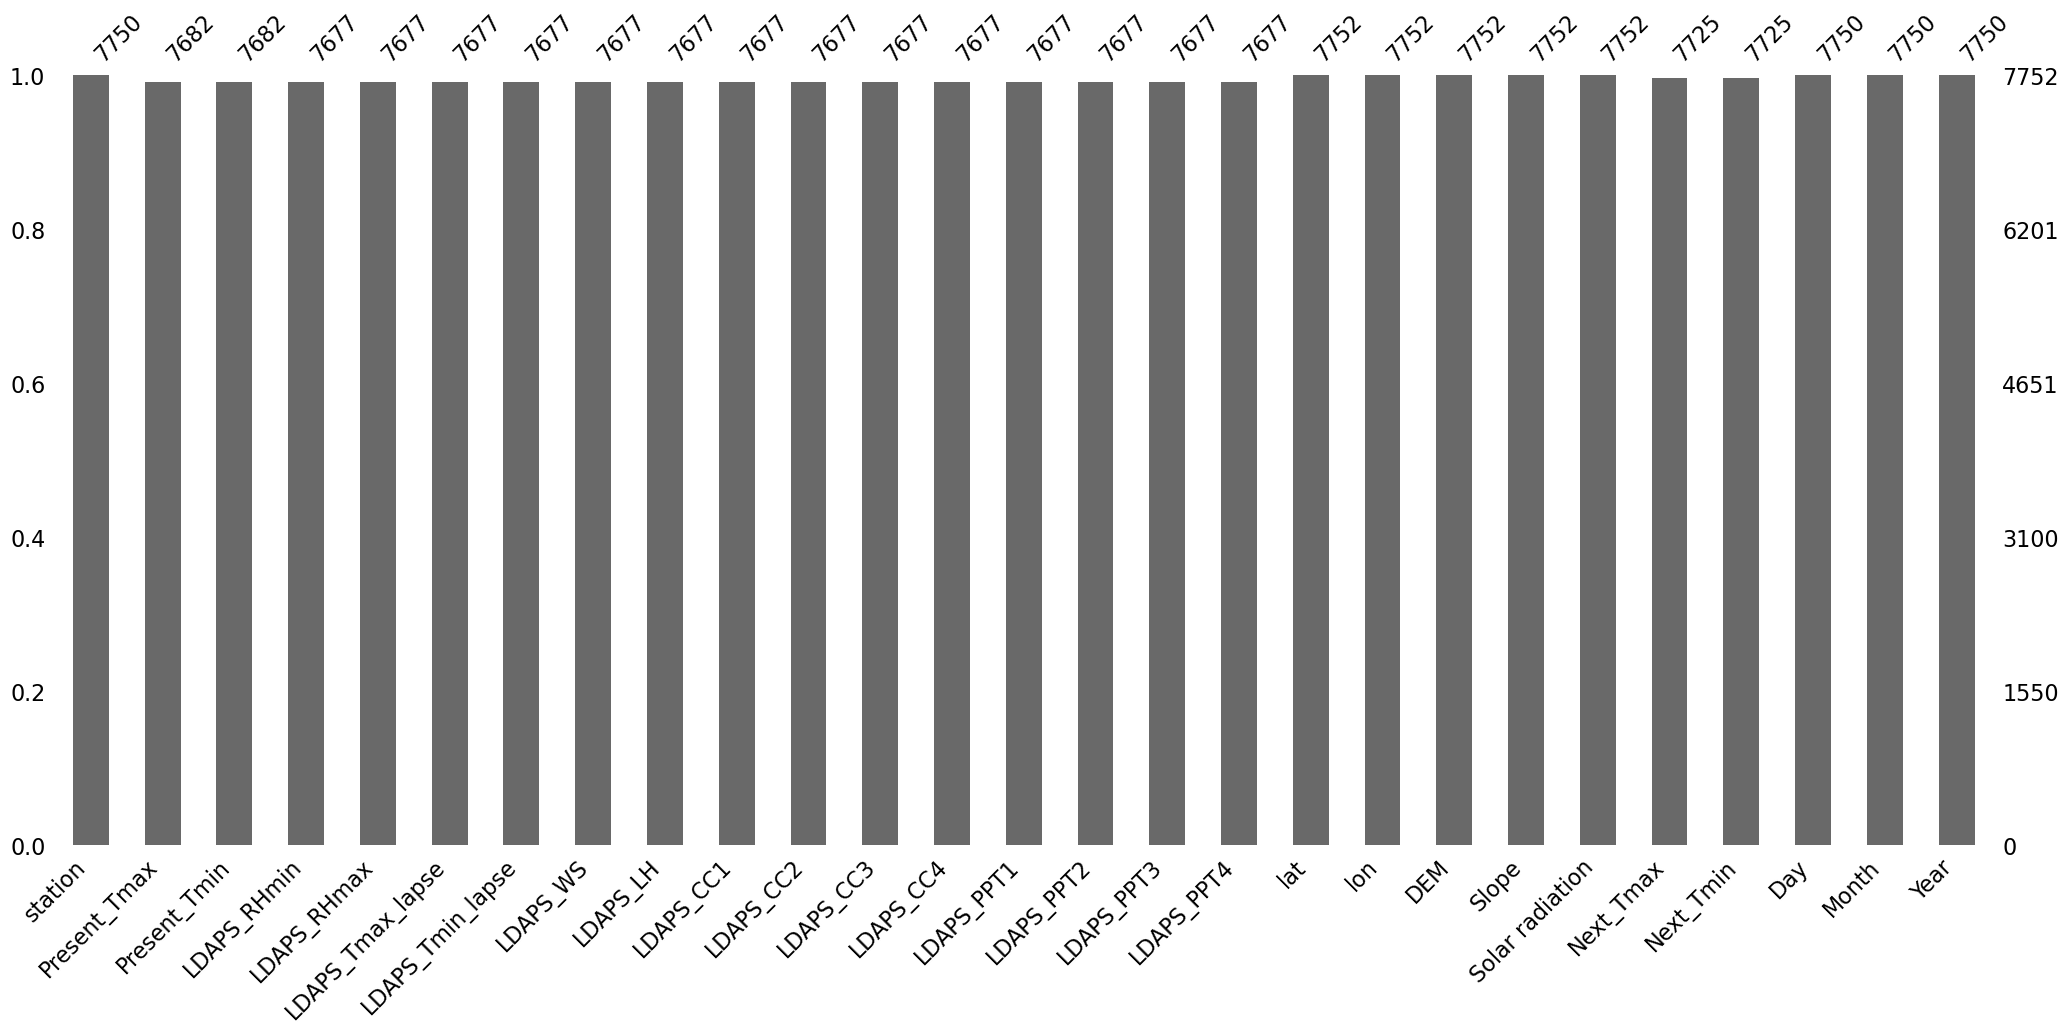

In [13]:
ms.bar(df)

So after getting a visual on the missing values we see that our dataset columns have only few null values present in them..

<AxesSubplot:>

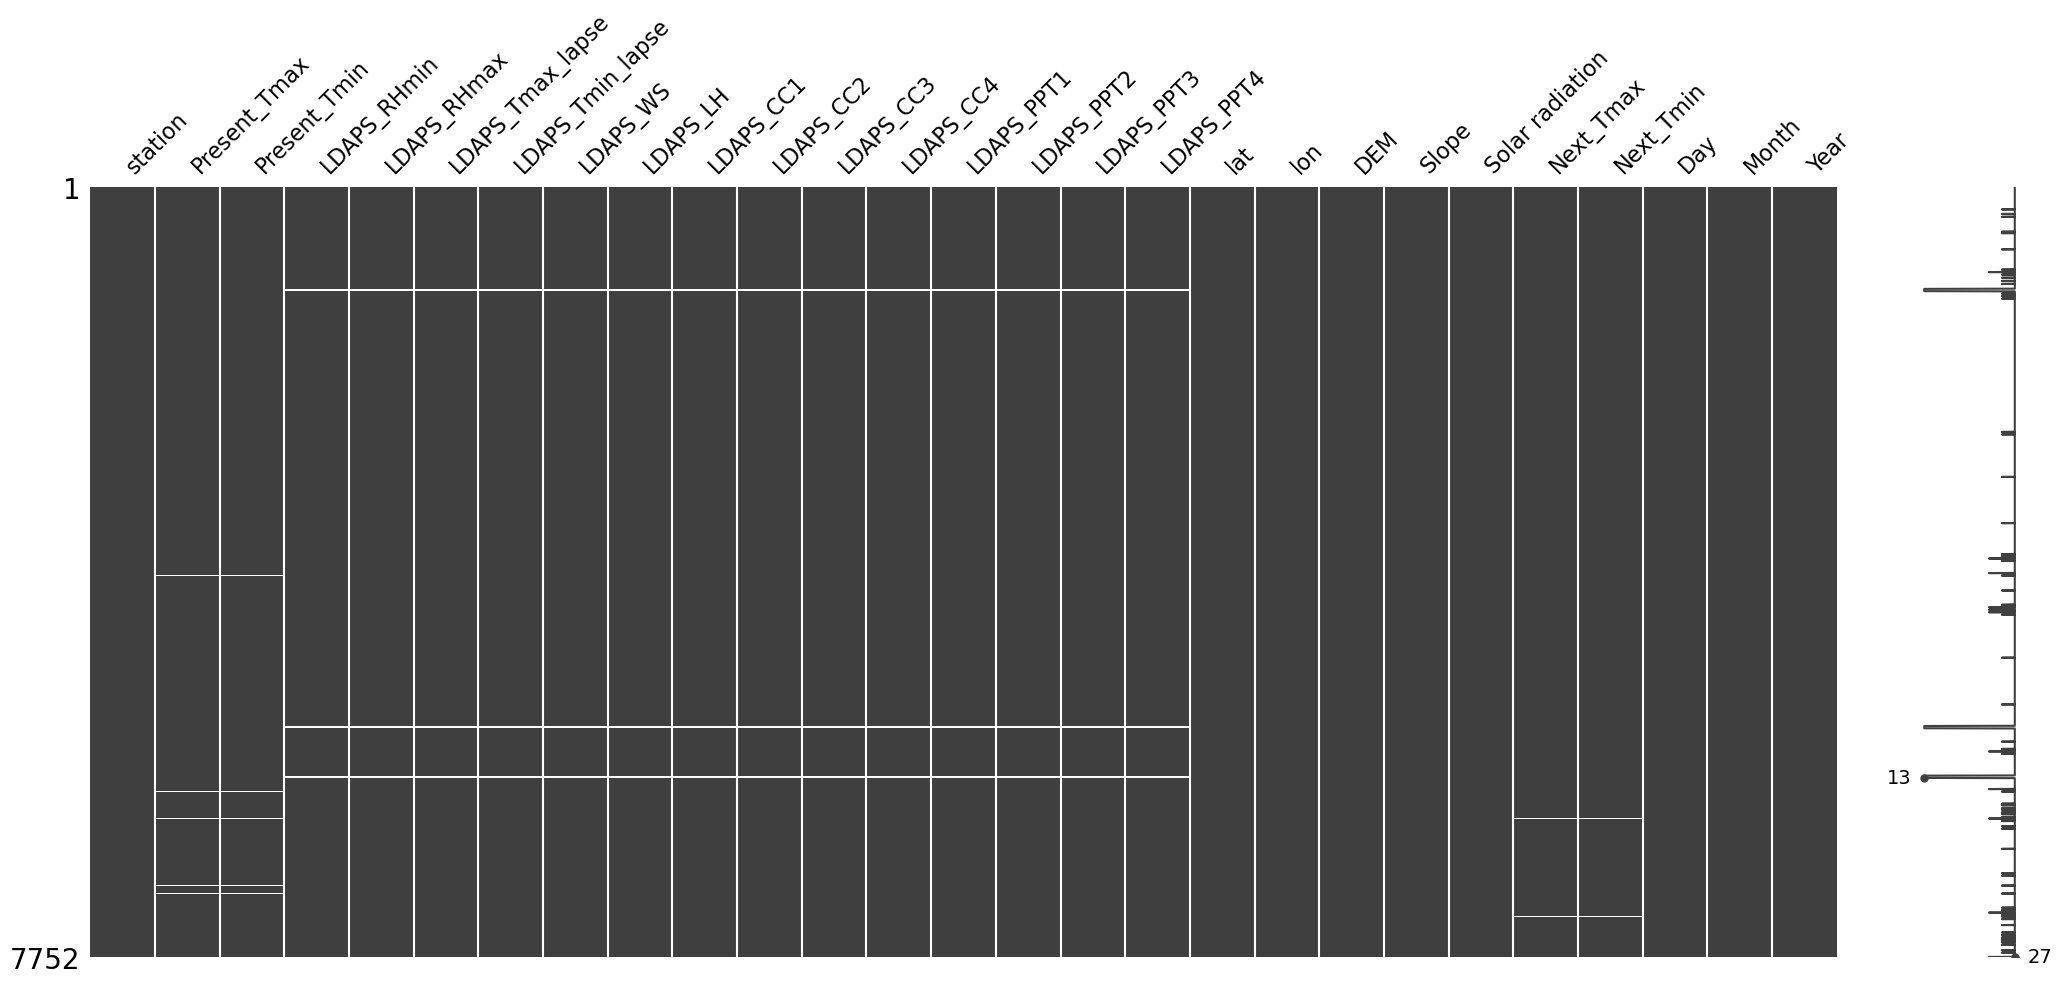

In [14]:
ms.matrix(df)

Matrix chart for missing value position

Okay so it looks like we have less than 1 percent of missing values in each column of our dataset. Since we have more than 7000 rows present in our entire dataframe , so have decided to drop those null values and get rid of missing data.

In [15]:
print("before we had:",df.shape)
df.dropna(inplace=True)
print ("after drop na we have:",df.shape)

before we had: (7752, 27)
after drop na we have: (7588, 27)


In [16]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

## find duplicate values

In [17]:
df.duplicated().sum()

0

there is no duplicated value present in the data set

## seperate the data columns

In [18]:
categorial_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorial_data.append(i)
print("categorial columns:",categorial_data)
print("\n")

Numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object":
        Numerical_data.append(i)
print("Numerical columns:",Numerical_data)

categorial columns: []


Numerical columns: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year']


we dont have any categorial column to transform

## find unique values

In [19]:
df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
Day                   21
Month                 12
Year                   5
dtype: int64

Using the nunique method we are able to list down all the unique values present in our dataset columns. I do not see any column with one single unique value covering all the rows of a column so that is good.

In [20]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    16.337375     7.068134   
std         429.782561     3.111807     2.482256     8.216880     2.242389   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

As per the above statistics, 
a few columns have huge numbers and it is difficult to assume anything by just looking at the table. Few features indicate that the value is greater than the median, indicating that the data is skewed to the right.

In [21]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
Day              -0.000996     -0.154366     -0.115693    -0.063464   
Month             0.001211     -0.003266     -0.010210    -0.053499   
Year              0.001474      0.056002      0.037457    -0.002147   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   
Day                 -0.012226         -0.161320        

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

<AxesSubplot:>

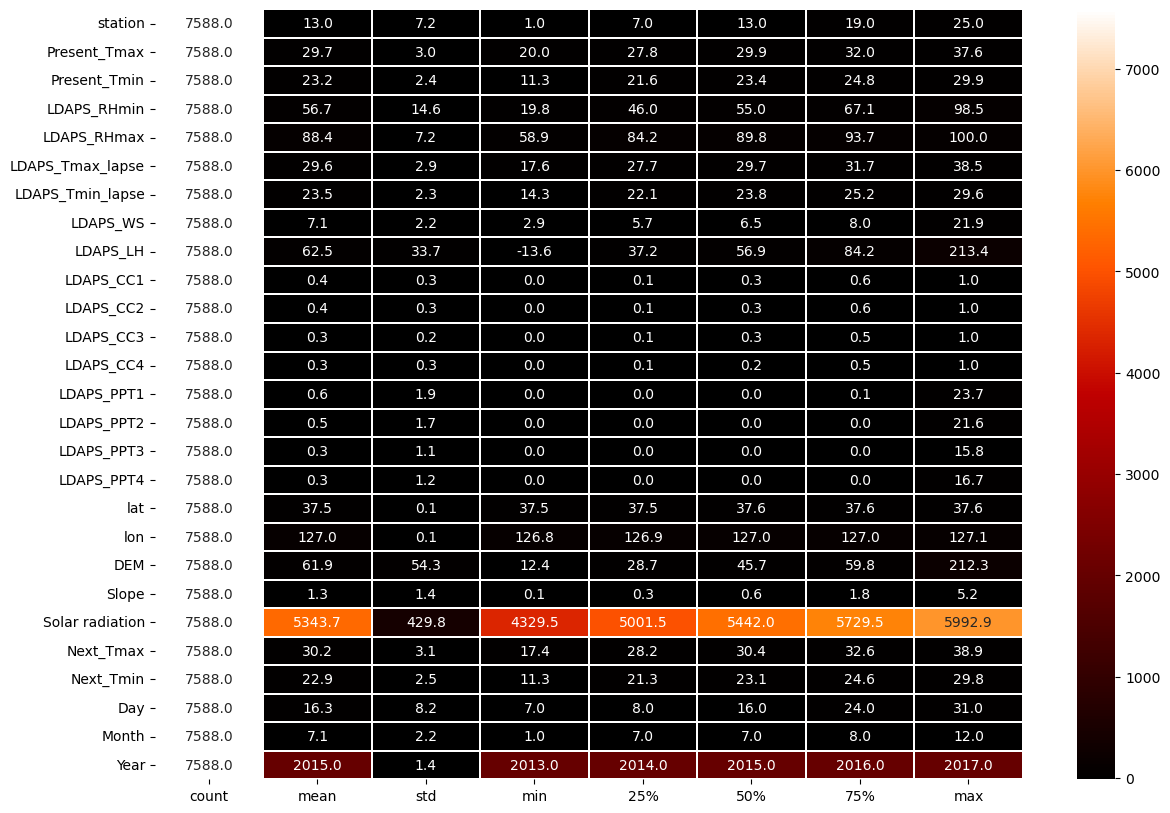

In [22]:
plt.figure(figsize=(14,10))
sns.heatmap(df.describe().T,linewidth=0.3,fmt='0.1f' ,annot=True,cmap='gist_heat')

### Comment-

Statistical analysis reveals  right skewness in feature distributions. Consistent counts signify a complete dataset.
Potential outliers, especially in 'Solar radiation',"year" warrant attention.
Heatmap highlights the need for feature scaling.

## Visualizing the correlation matrix by plotting heat map.

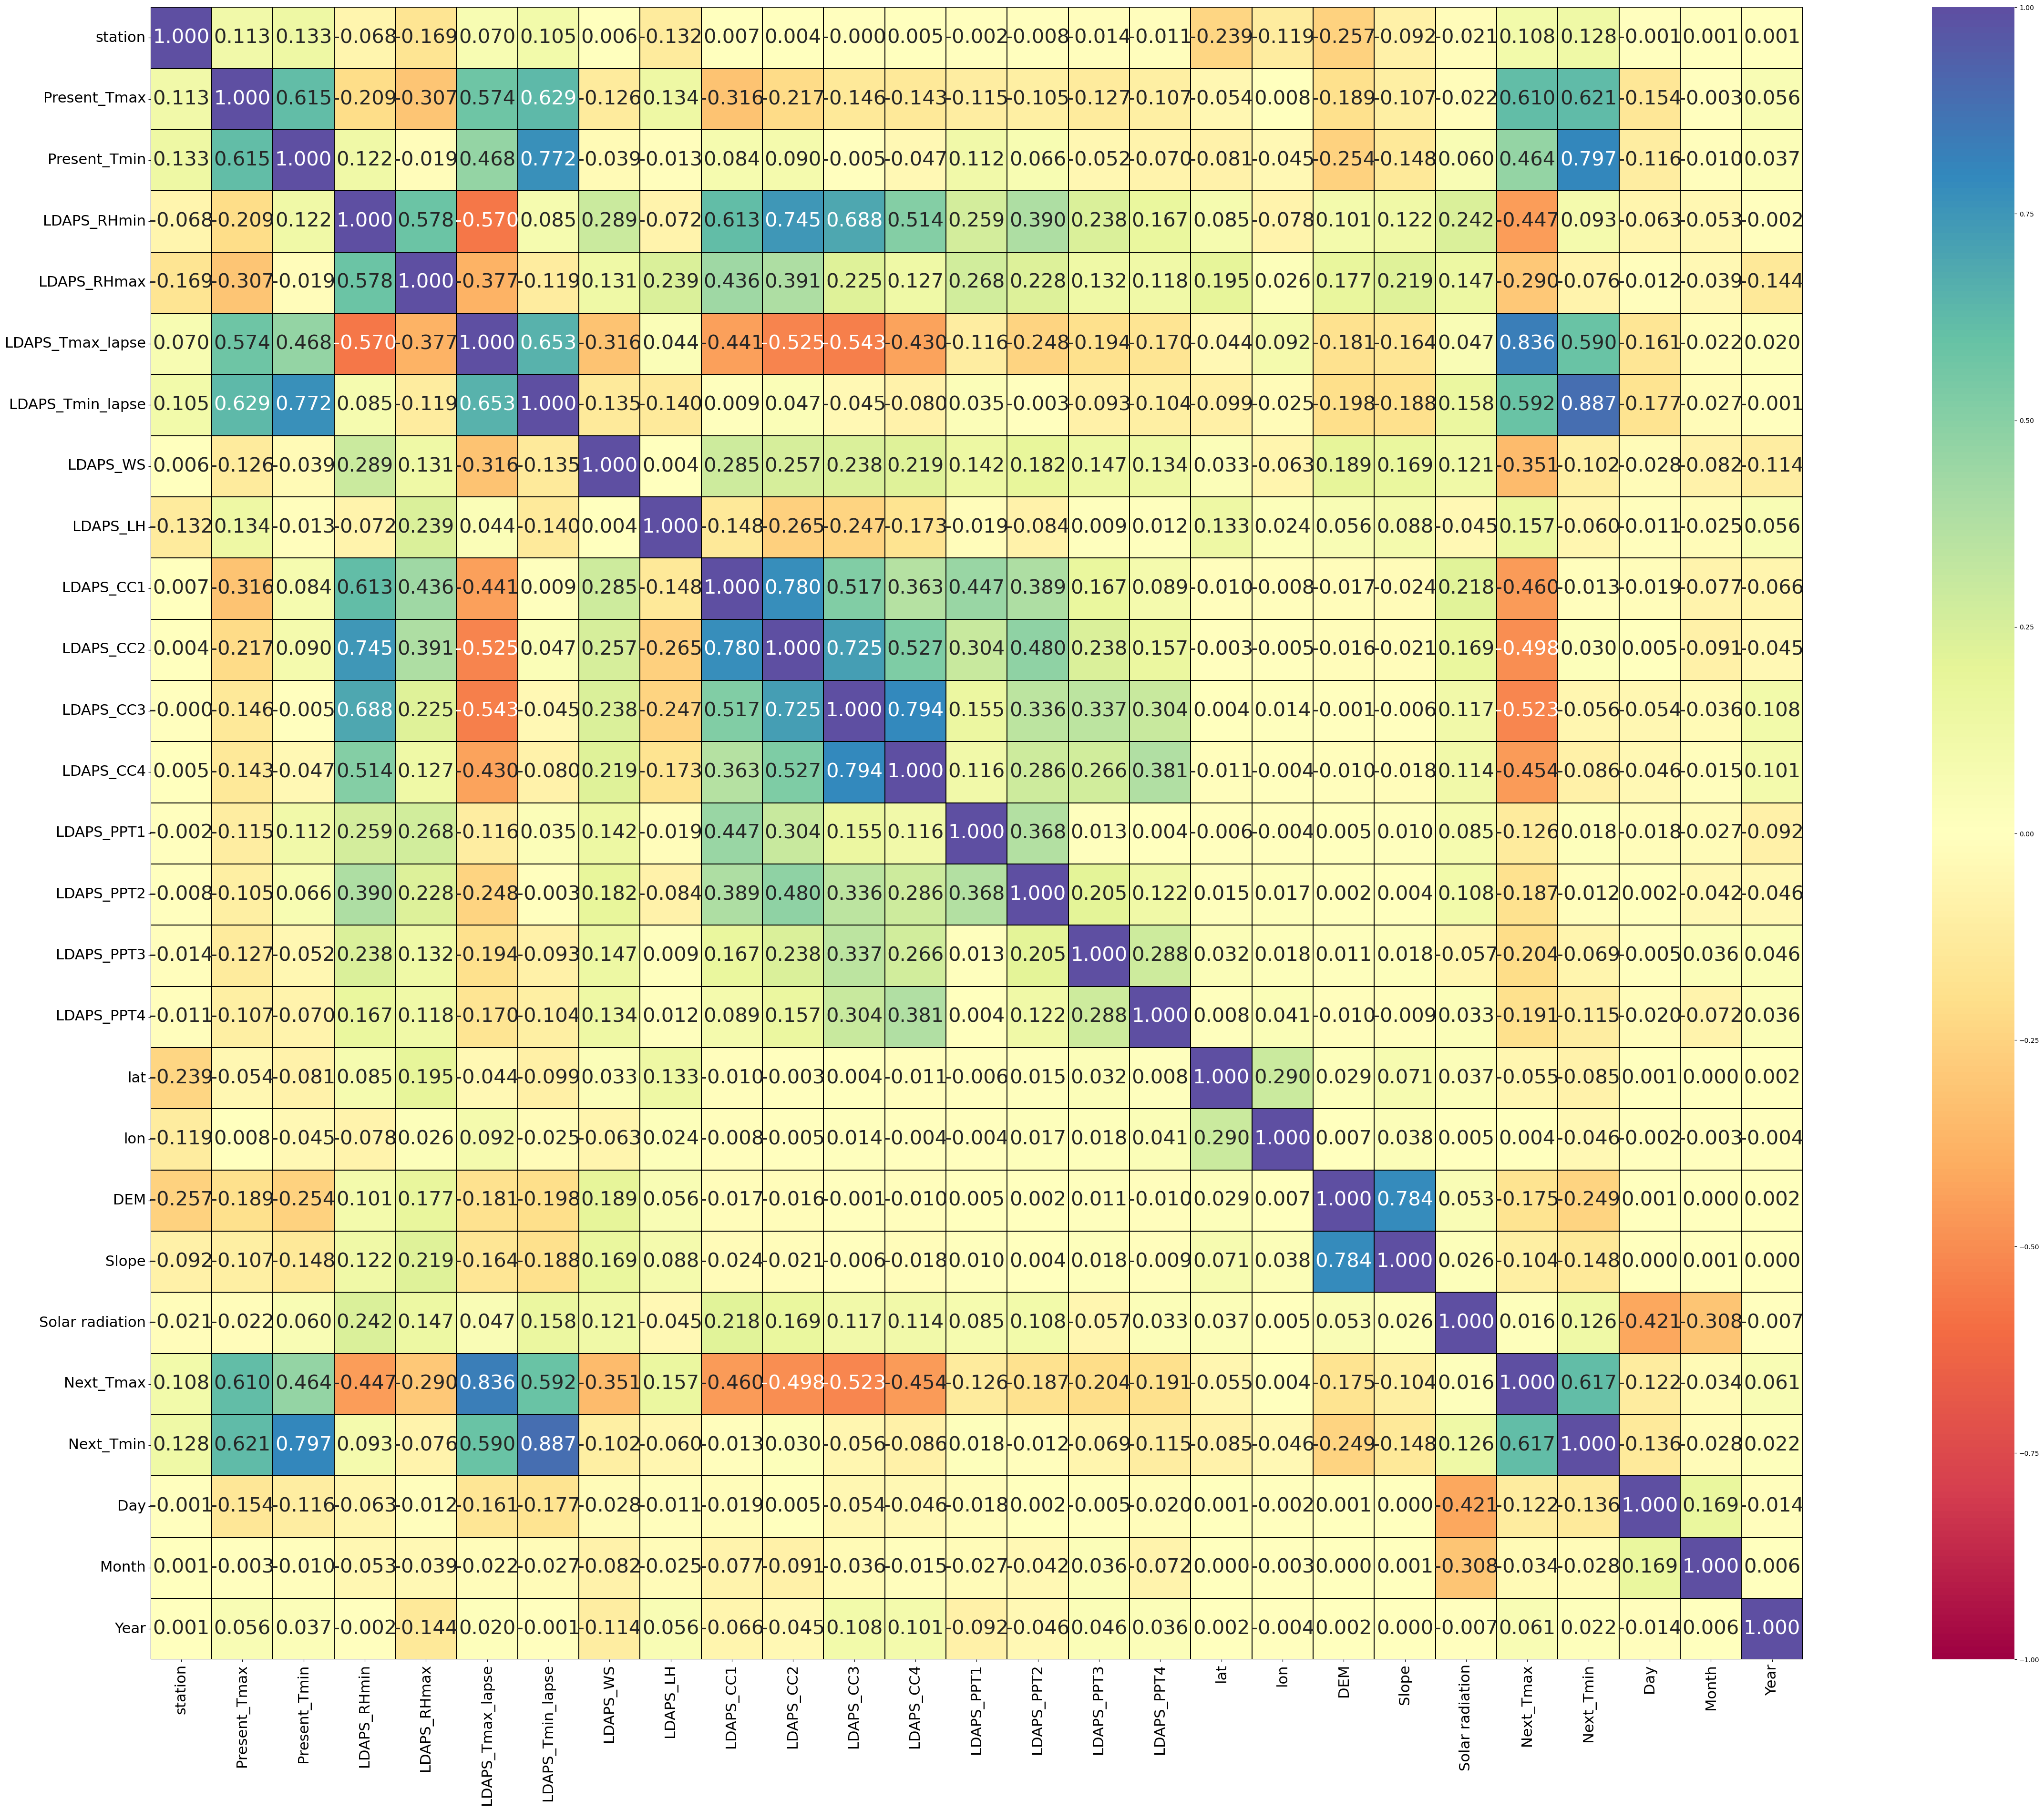

In [23]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(70,45))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':30}, cmap="Spectral")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

when Next_tmax is our target variable, there is Next_tmin,LDAPS_CC3,LDAPS_TMAX_lapse, present_Tmax is highly correlated with target value. 

In [24]:
feature_columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
                   'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 
                   'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Day', 
                   'Month', 'Year', 'lat', 'lon']

label_columns = ['Next_Tmax', 'Next_Tmin']

<font size=6>**Correlation Bar Plot comparing features with our label**

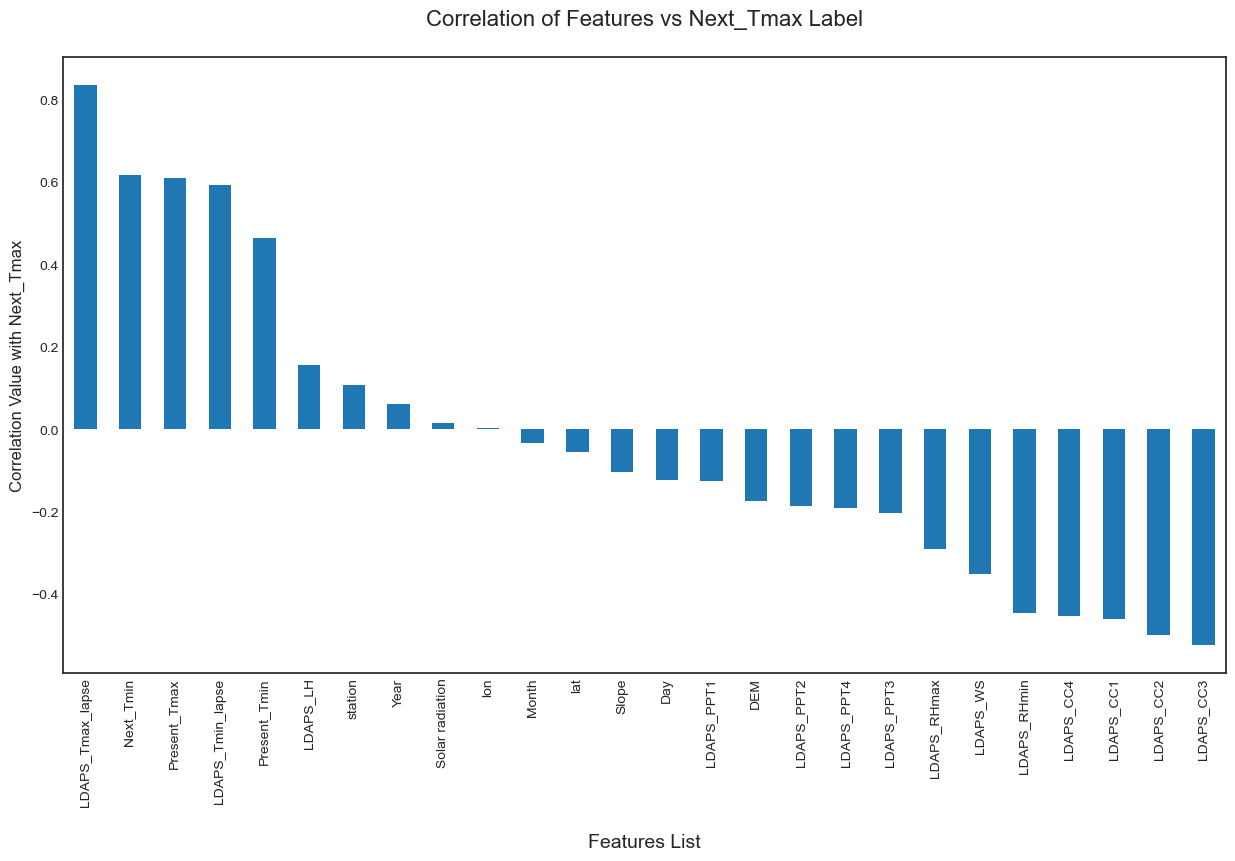

In [25]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr[label_columns[0]].sort_values(ascending=False).drop(label_columns[0]).plot.bar()
plt.title("Correlation of Features vs Next_Tmax Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value with Next_Tmax", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that less than half the columns in our dataset are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our regression temperature label "Next_Tmax"

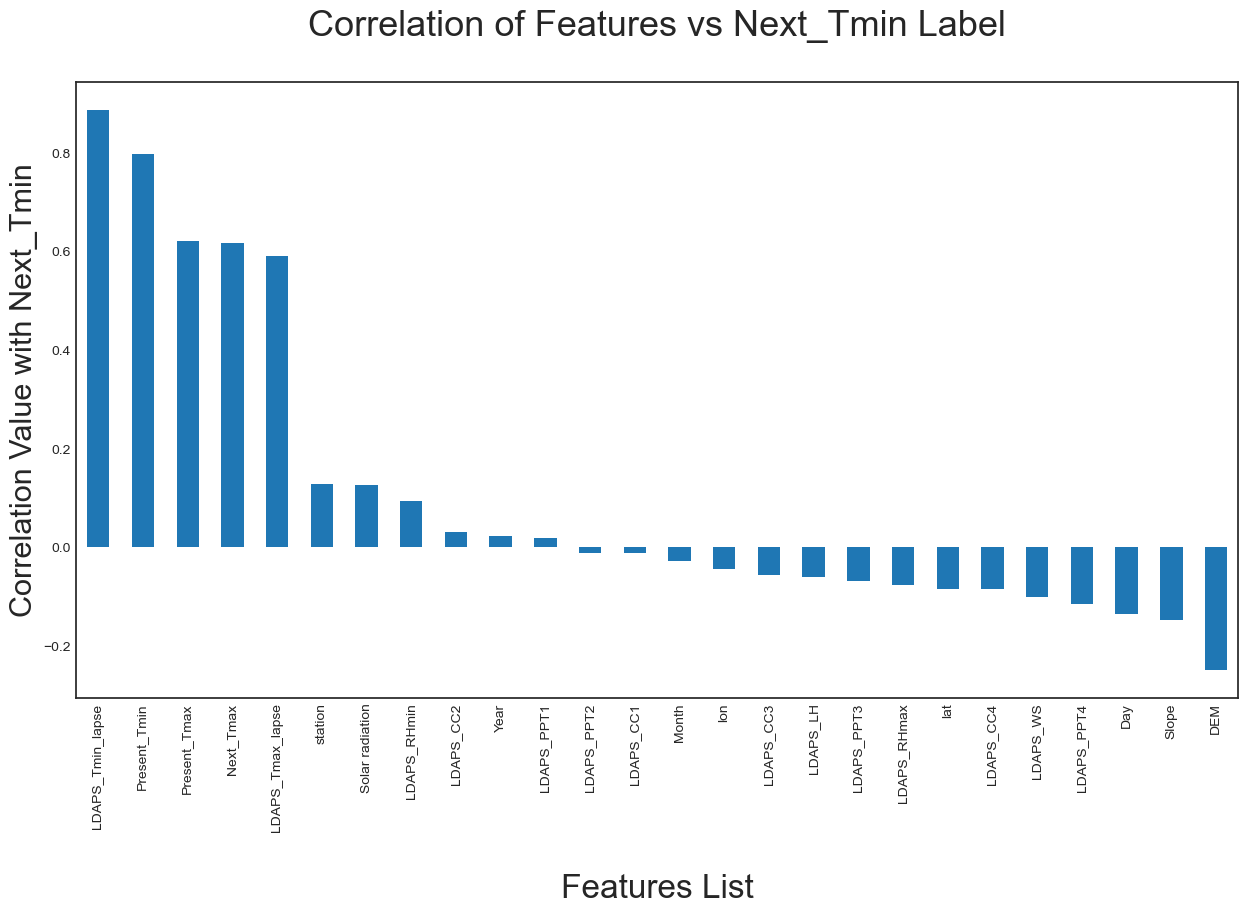

In [26]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr[label_columns[1]].sort_values(ascending=False).drop(label_columns[1]).plot.bar()
plt.title("Correlation of Features vs Next_Tmin Label\n", fontsize=26)
plt.xlabel("\nFeatures List", fontsize=24)
plt.ylabel("Correlation Value with Next_Tmin", fontsize=22)
plt.show()

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that more than half the columns in our dataset are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our regression temperature label "Next_Tmin"

## Visualisation

<Figure size 800x800 with 0 Axes>

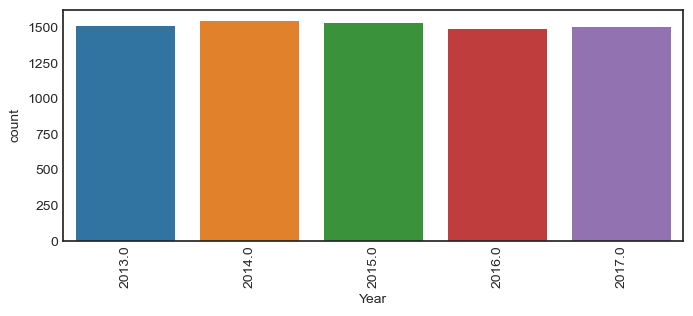

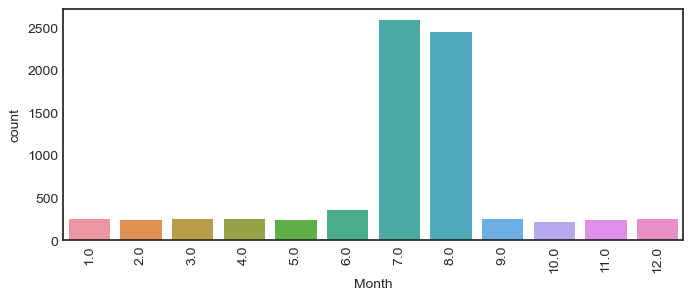

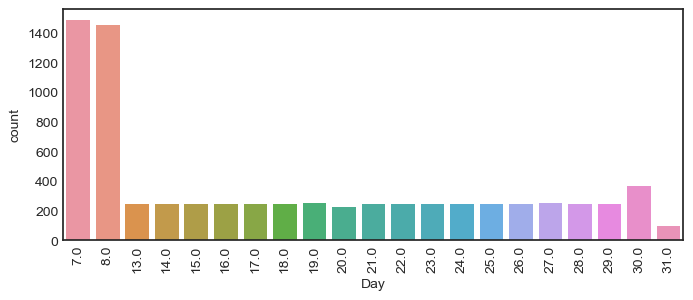

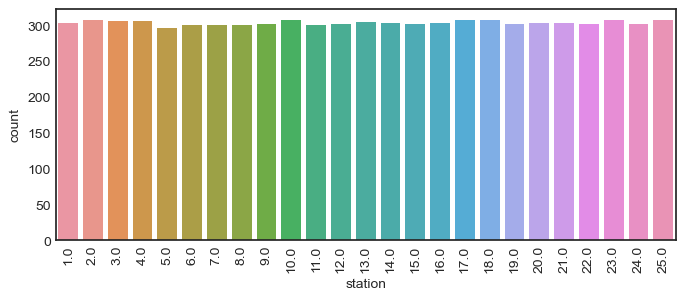

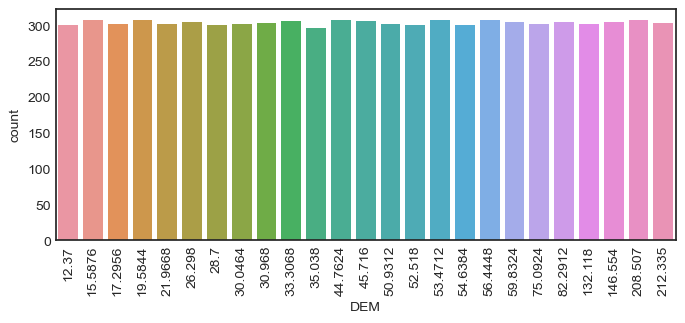

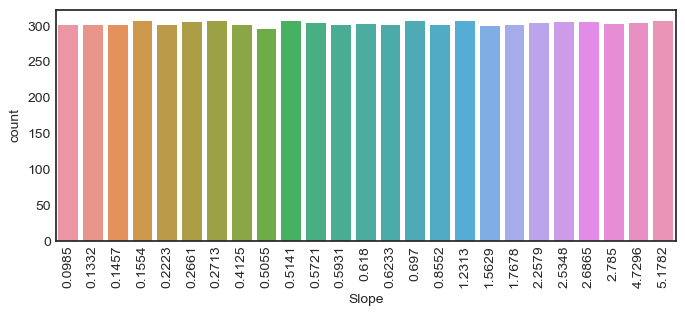

In [27]:
plt.figure(figsize=(8,8))
col1 = ['Year', 'Month', 'Day', 'station', 'DEM', 'Slope']
for i in col1:
    plt.figure(figsize=(8,3))
    sns.countplot(x=df[i])
    plt.xticks(rotation=90)
    plt.show()

We motice the following from above graphs-
1) Year shows that almost all year data points have equal coverage
2) Month shows a very high peak in data for months July and August
3) Day shows a very high peak in data for days 7 and 8 of a month
4) Station(25) also shows almost equal data coverage for all it's unique values
5) DEM(25) has almost equal data coverage for all it's unique values
6) Slope(27) again shows almost equal data coverage for all it's unique values

In [28]:
cols2=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

Scatter plot for Present_Tmax column with respect to the rows covered ->


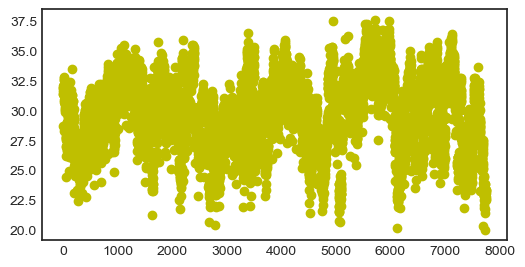

Scatter plot for Present_Tmin column with respect to the rows covered ->


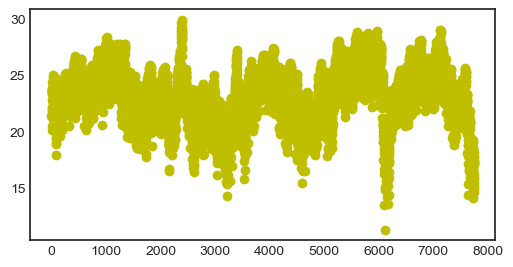

Scatter plot for LDAPS_RHmin column with respect to the rows covered ->


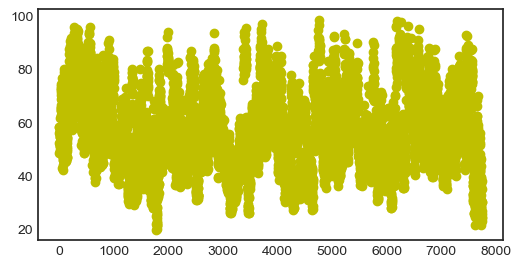

Scatter plot for LDAPS_RHmax column with respect to the rows covered ->


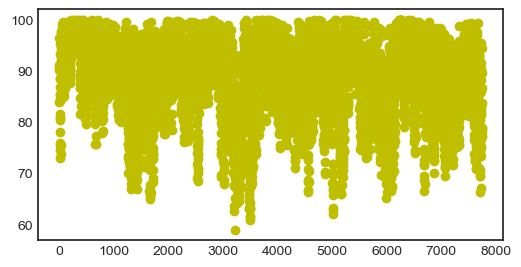

Scatter plot for LDAPS_Tmax_lapse column with respect to the rows covered ->


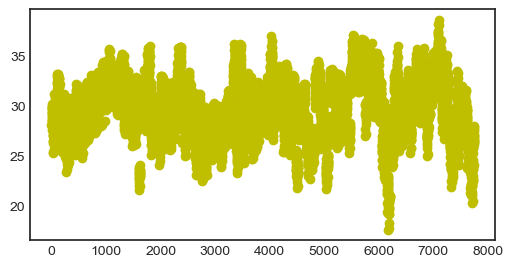

Scatter plot for LDAPS_Tmin_lapse column with respect to the rows covered ->


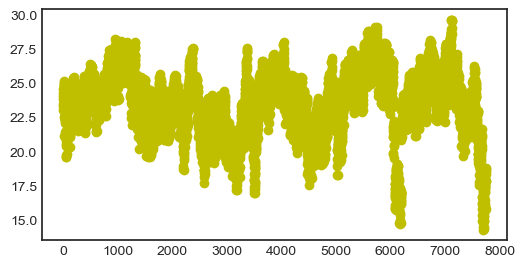

Scatter plot for LDAPS_WS column with respect to the rows covered ->


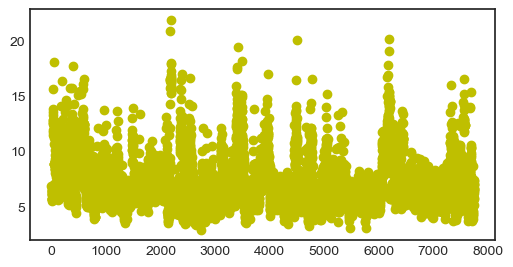

Scatter plot for LDAPS_LH column with respect to the rows covered ->


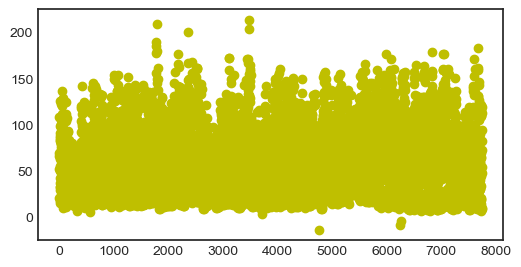

Scatter plot for LDAPS_CC1 column with respect to the rows covered ->


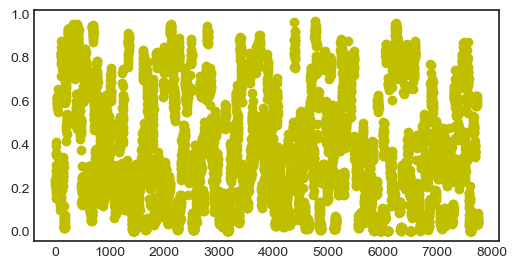

Scatter plot for LDAPS_CC2 column with respect to the rows covered ->


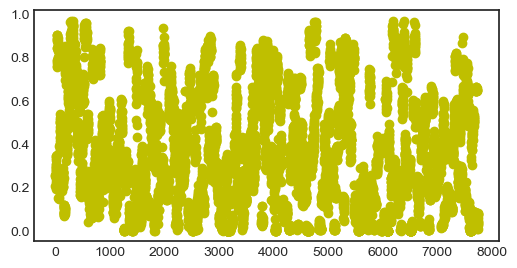

Scatter plot for LDAPS_CC3 column with respect to the rows covered ->


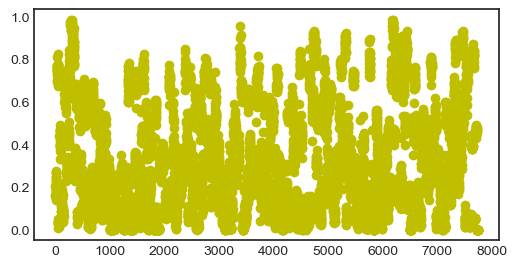

Scatter plot for LDAPS_CC4 column with respect to the rows covered ->


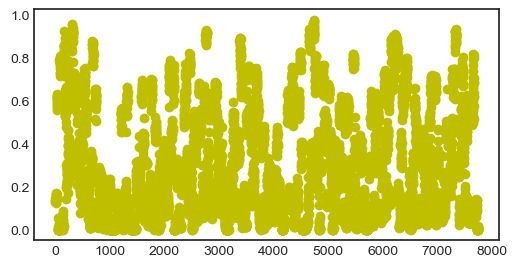

Scatter plot for LDAPS_PPT1 column with respect to the rows covered ->


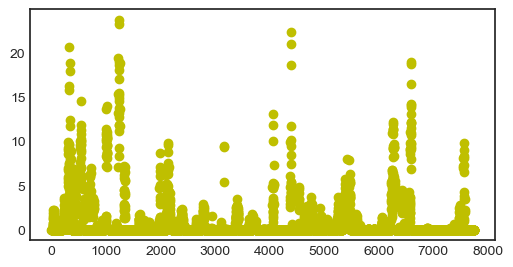

Scatter plot for LDAPS_PPT2 column with respect to the rows covered ->


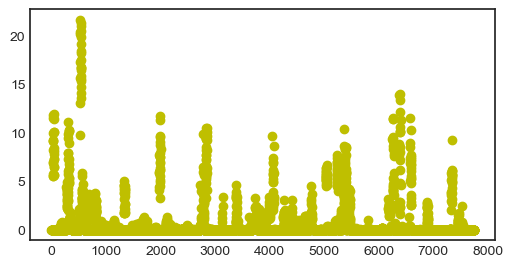

Scatter plot for LDAPS_PPT3 column with respect to the rows covered ->


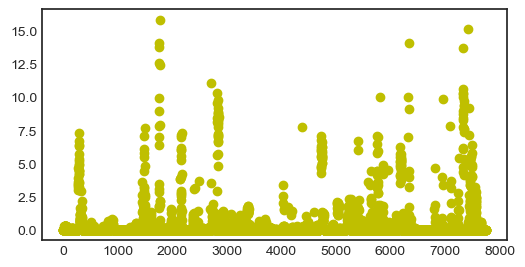

Scatter plot for LDAPS_PPT4 column with respect to the rows covered ->


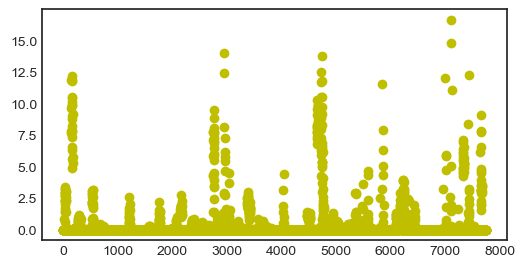

Scatter plot for Solar radiation column with respect to the rows covered ->


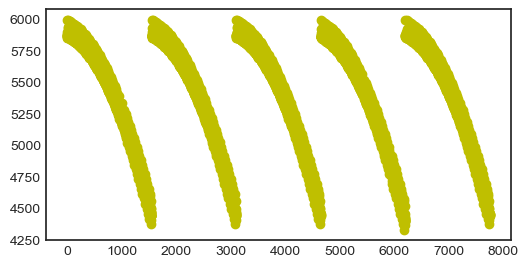

Scatter plot for Next_Tmax column with respect to the rows covered ->


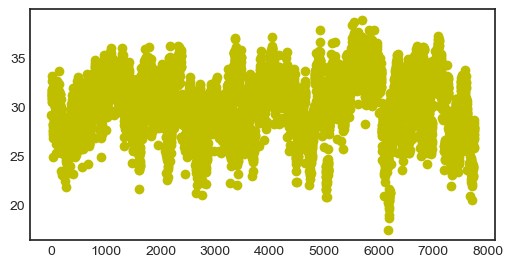

Scatter plot for Next_Tmin column with respect to the rows covered ->


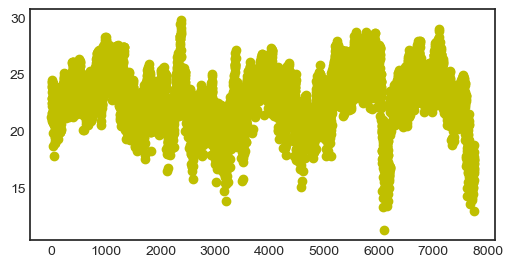

In [29]:
for i in df[cols2]:
    plt.figure(figsize=(6,3))
    print(f"Scatter plot for {i} column with respect to the rows covered ->")
    plt.scatter(df.index, df[i],color='y')
    plt.show()

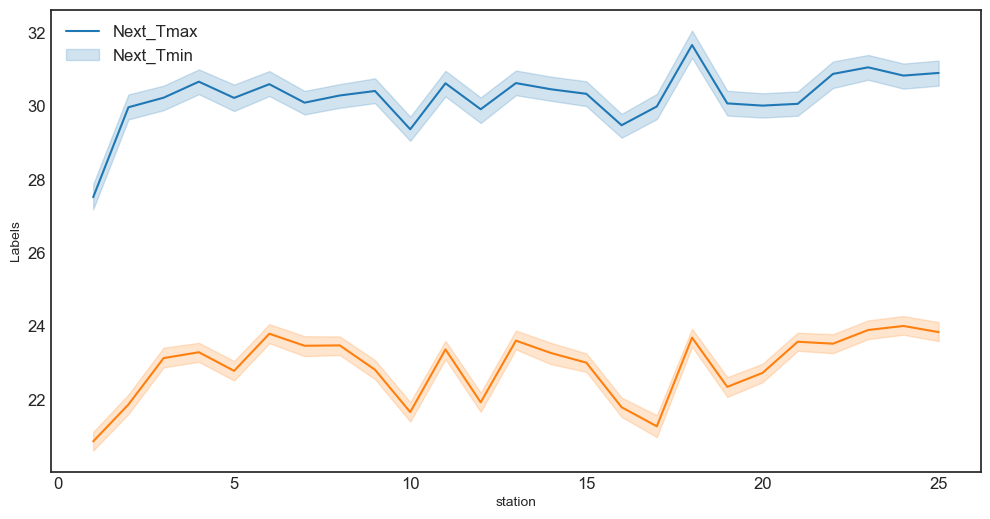

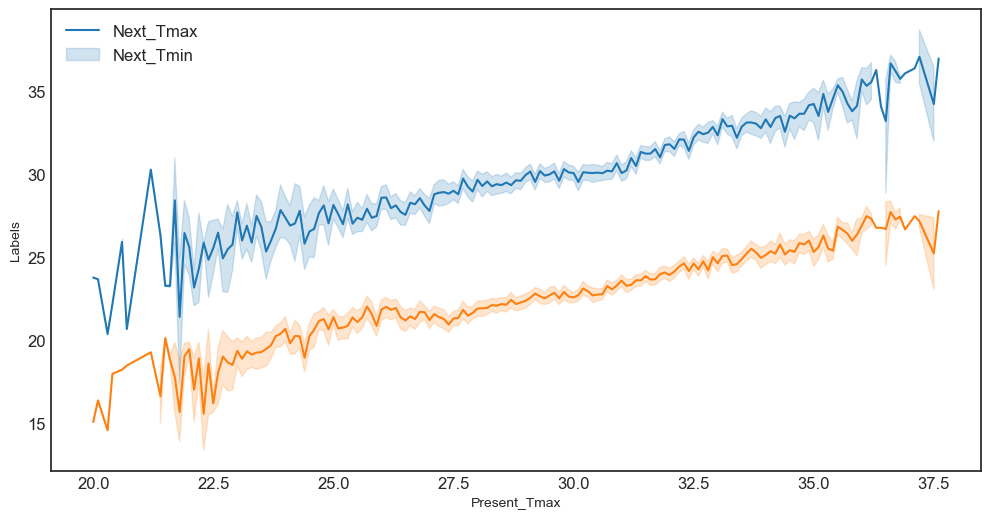

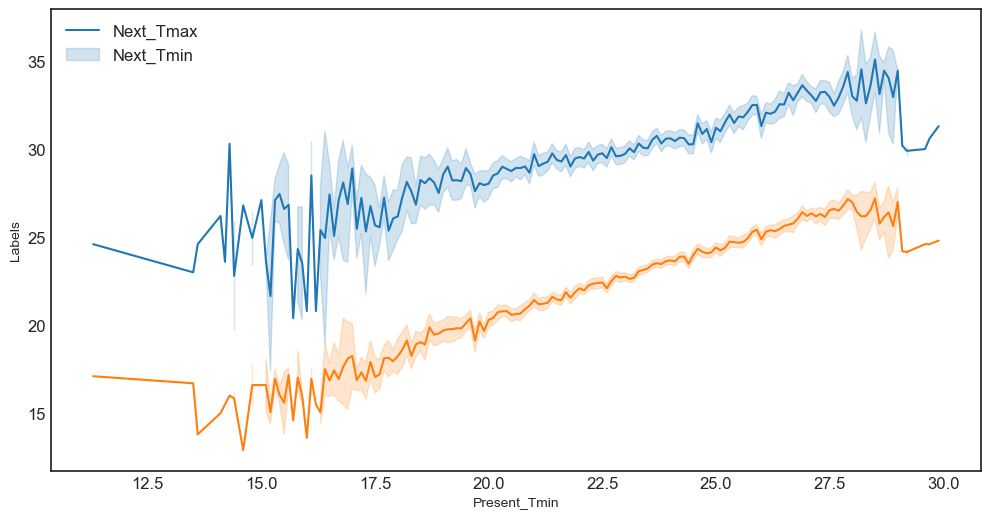

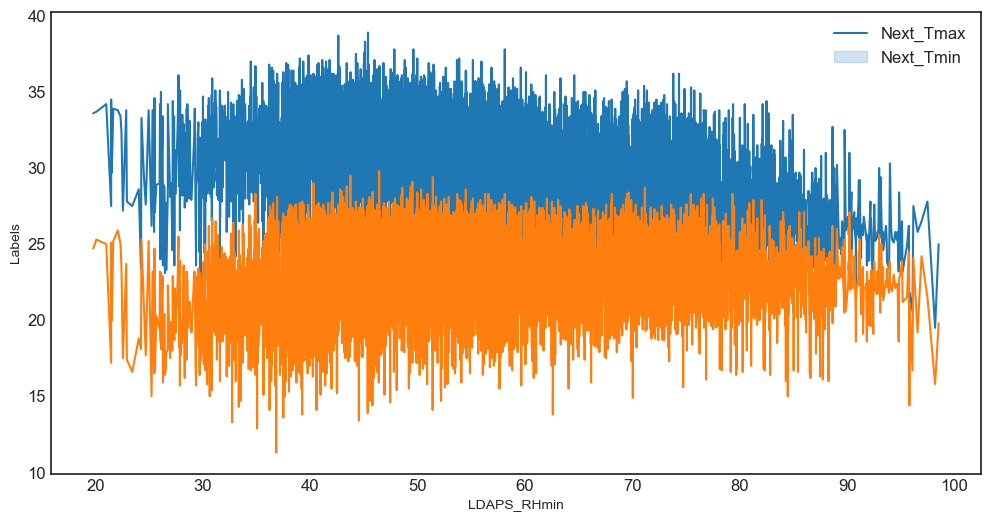

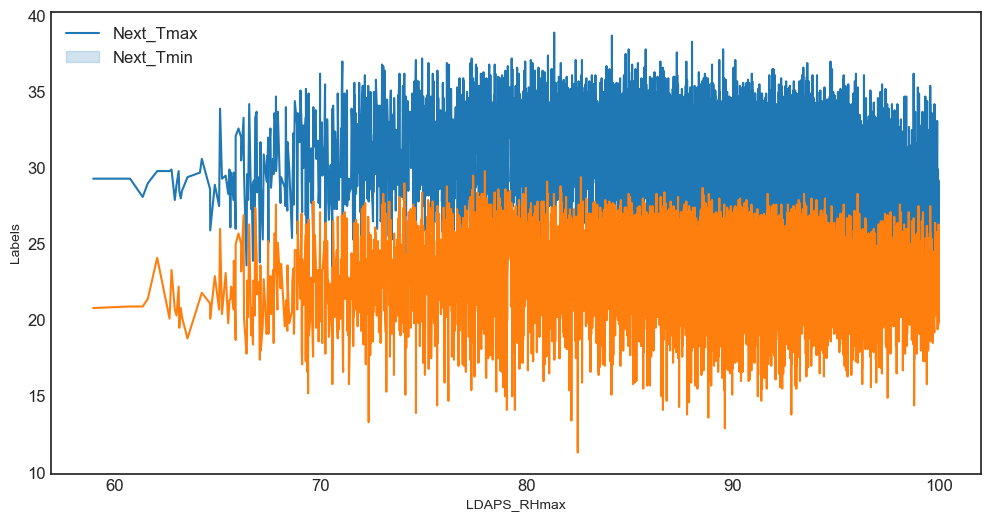

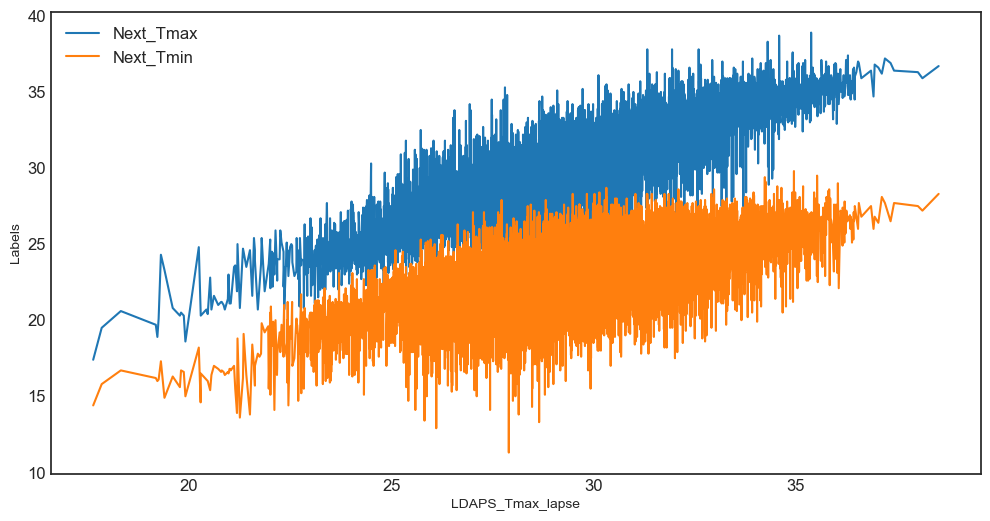

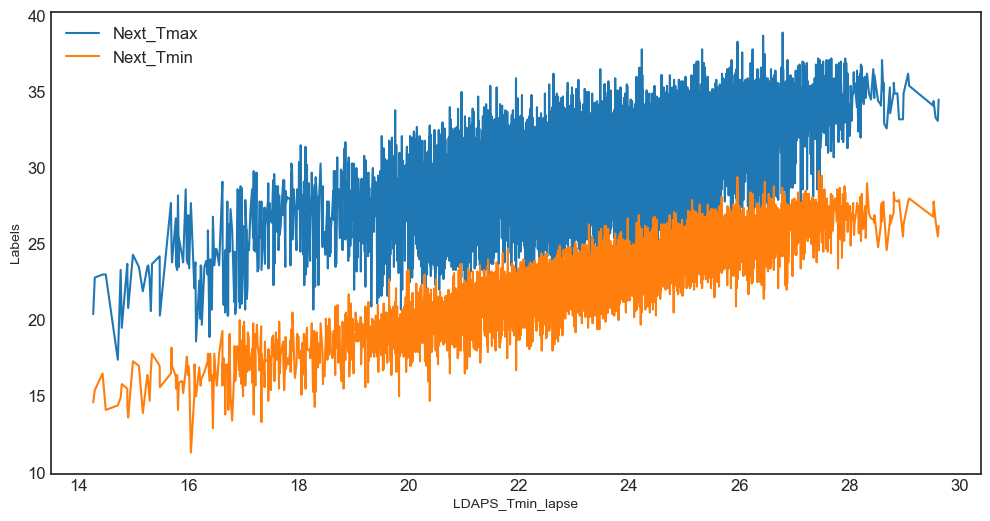

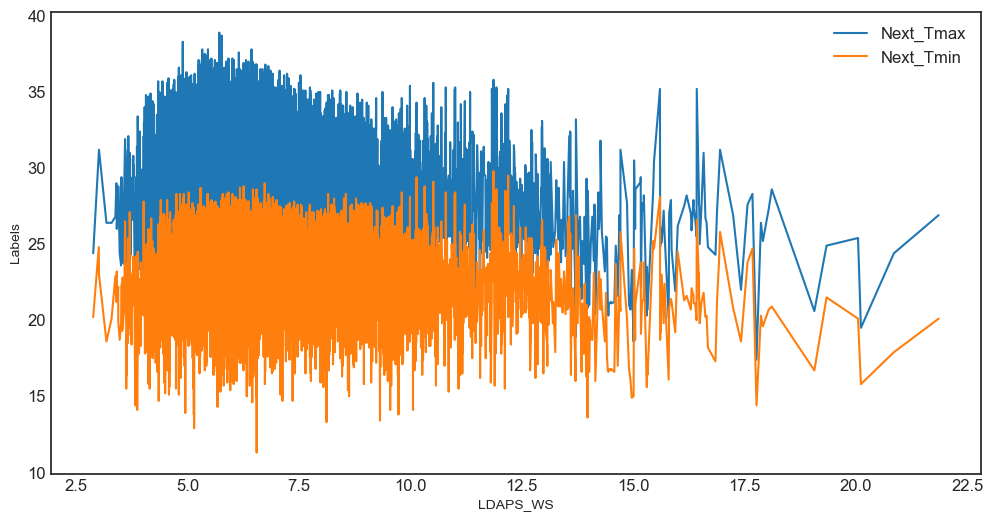

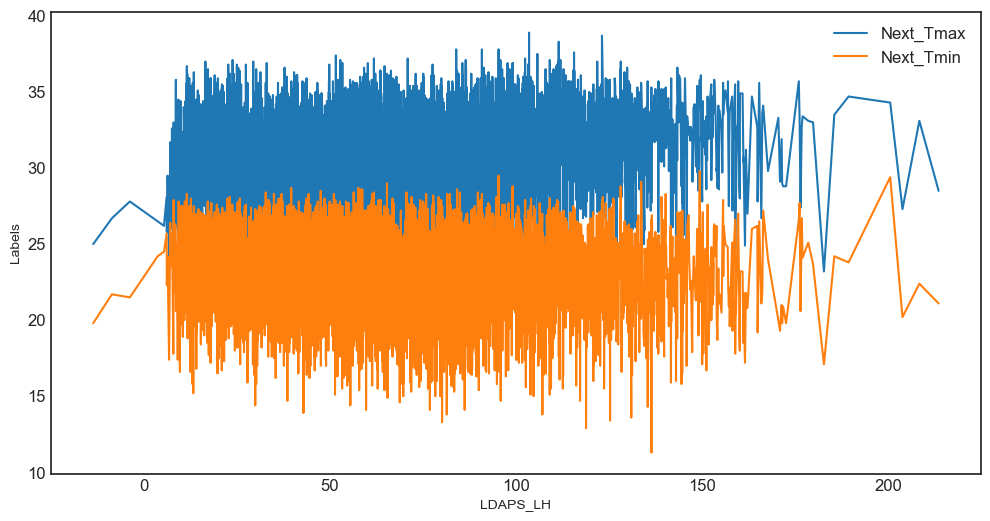

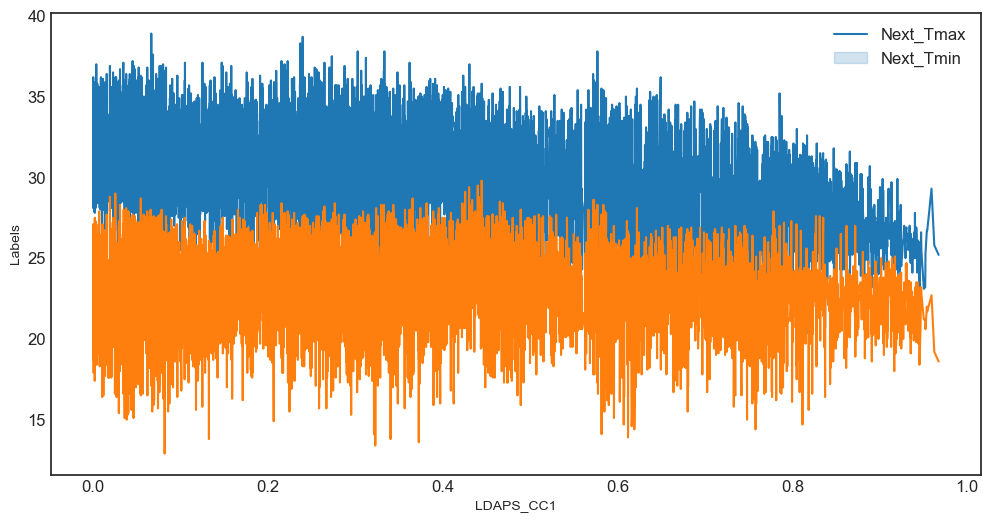

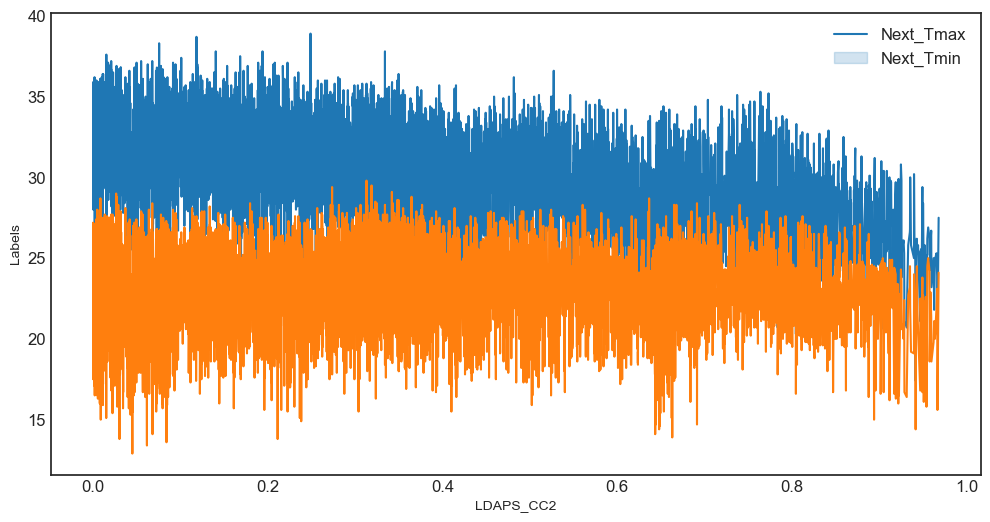

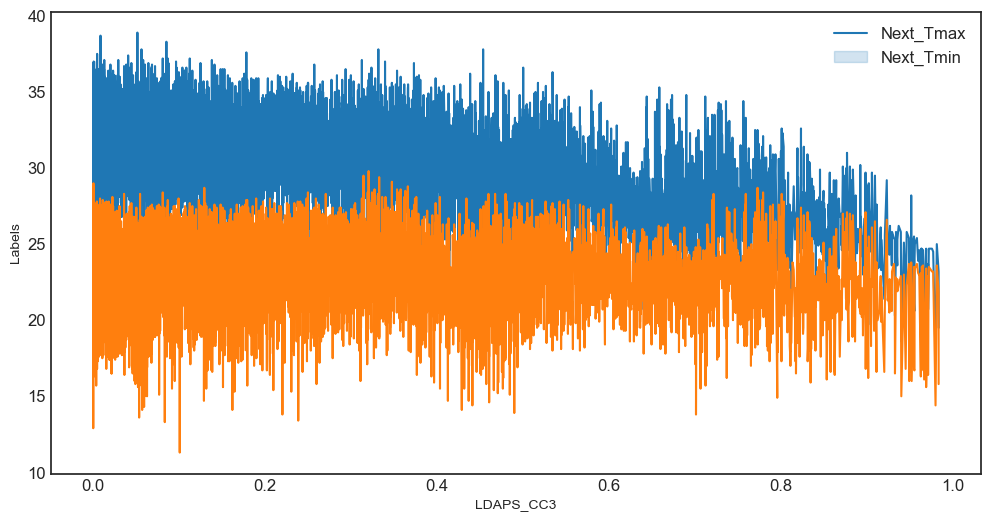

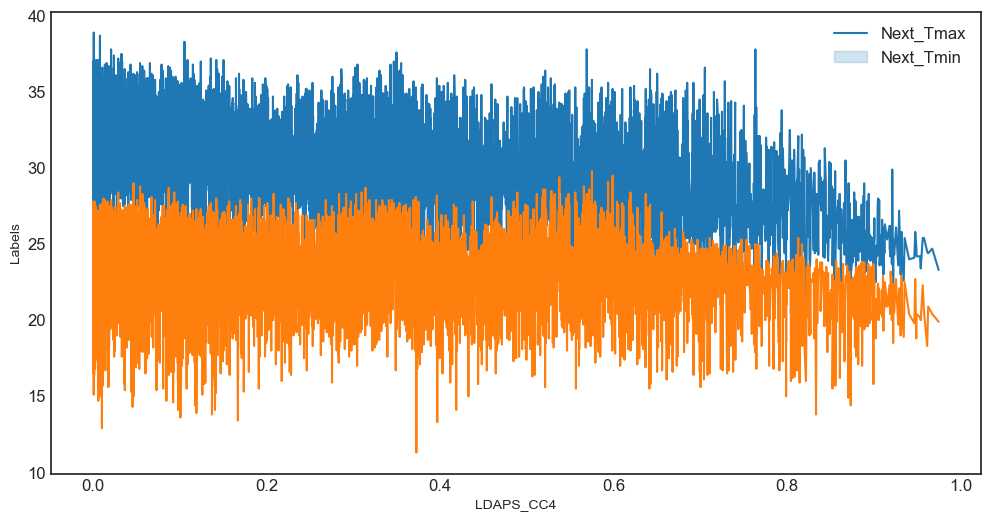

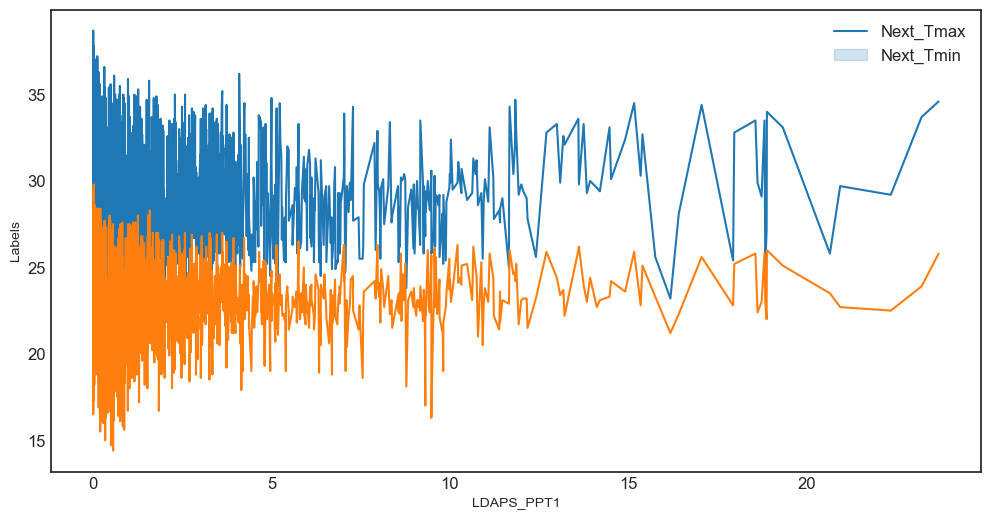

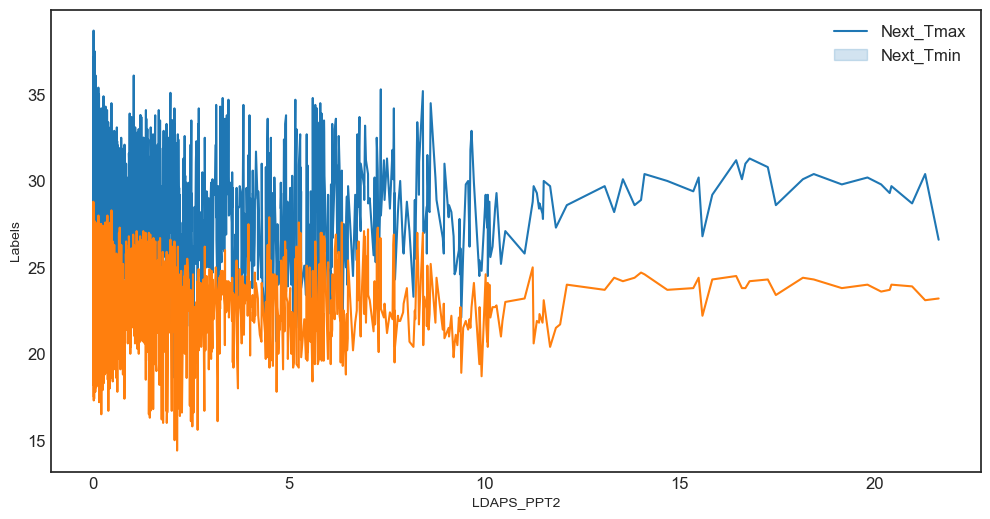

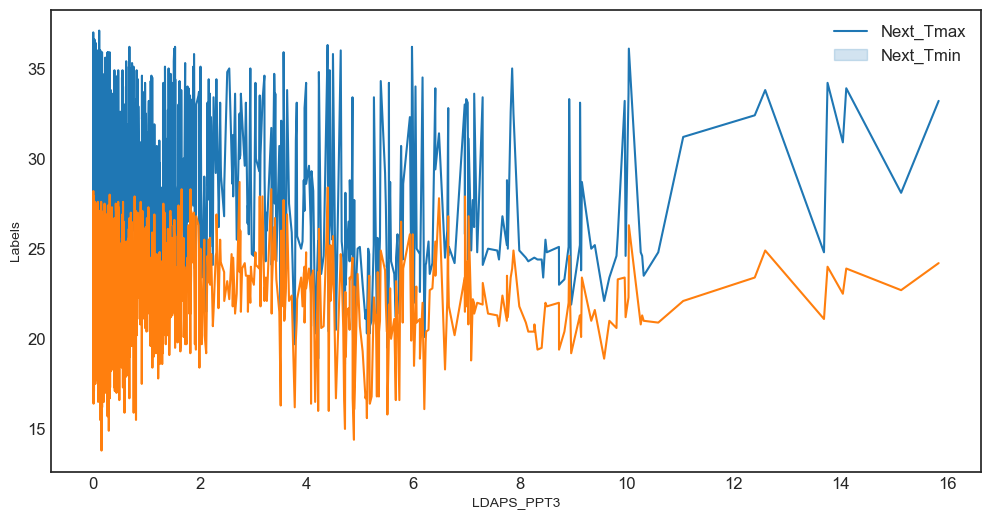

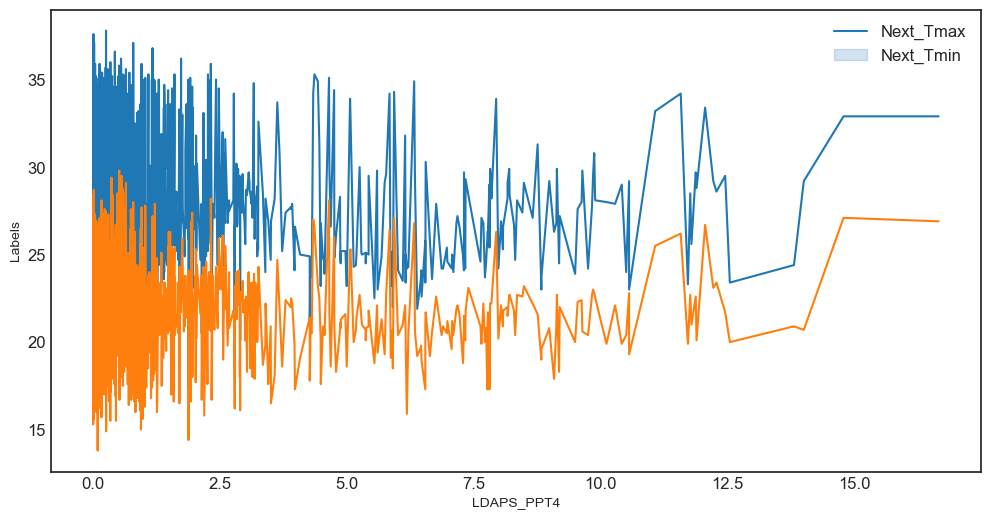

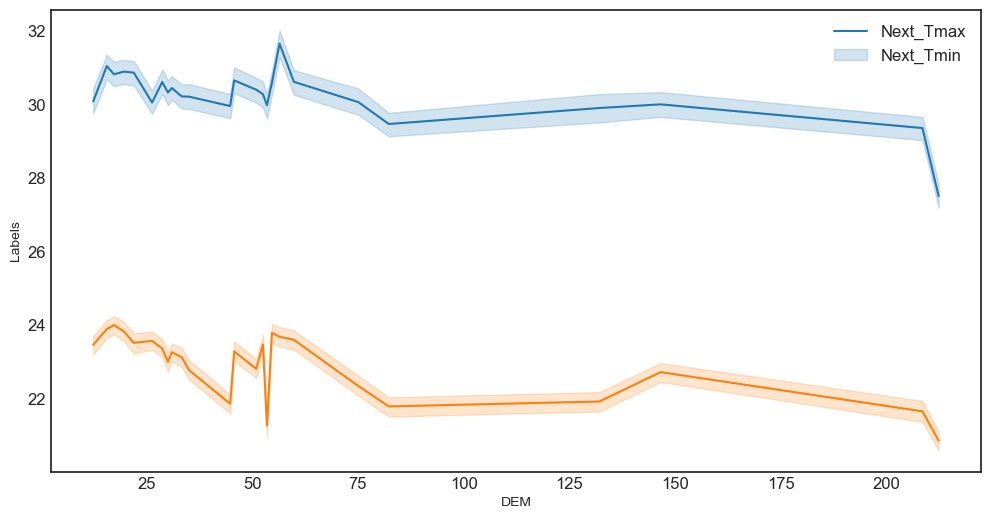

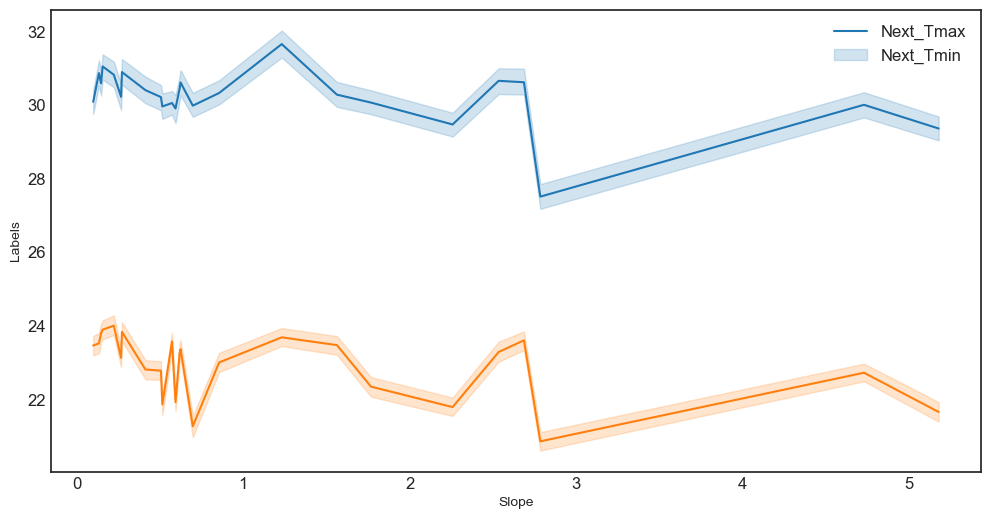

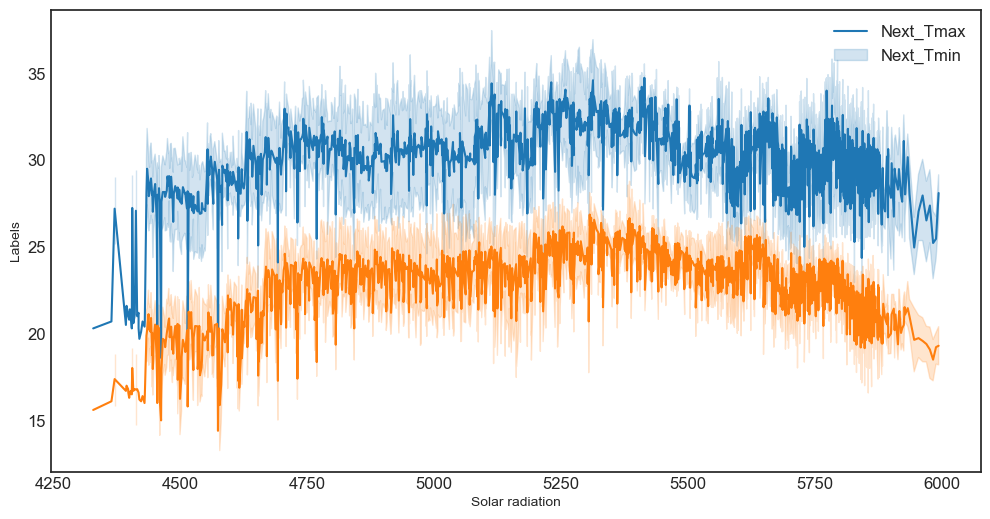

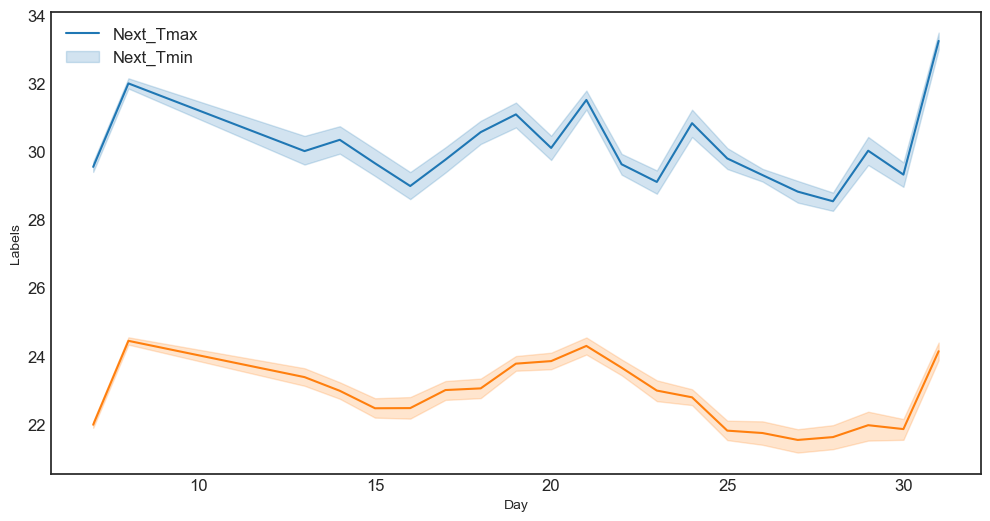

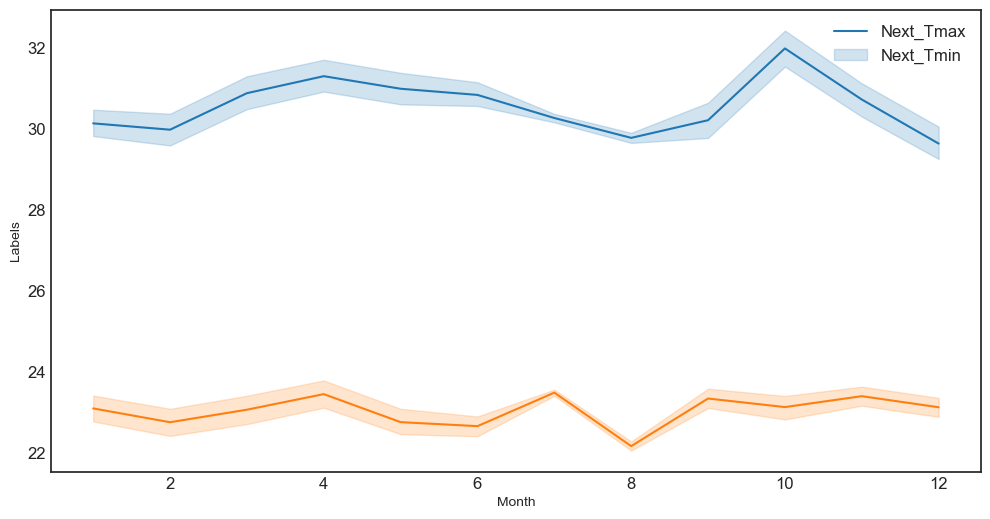

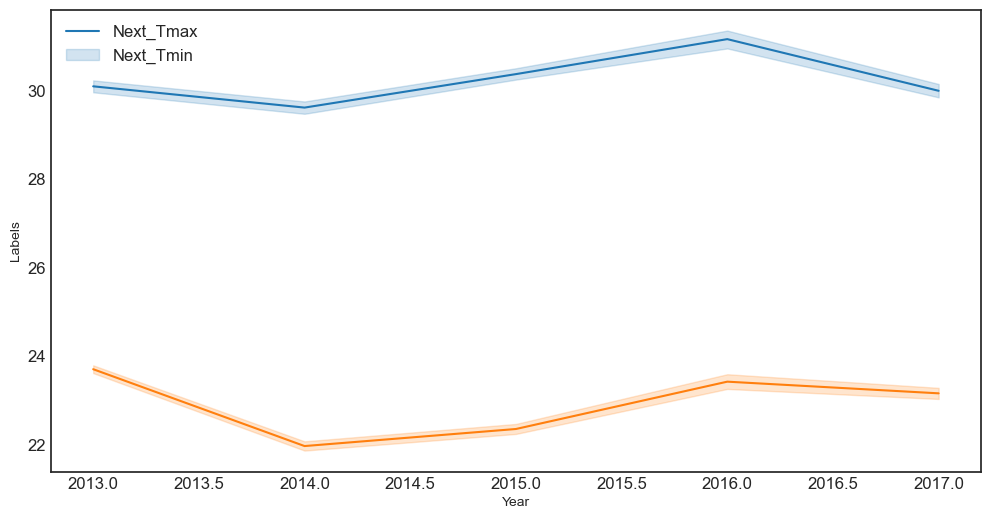

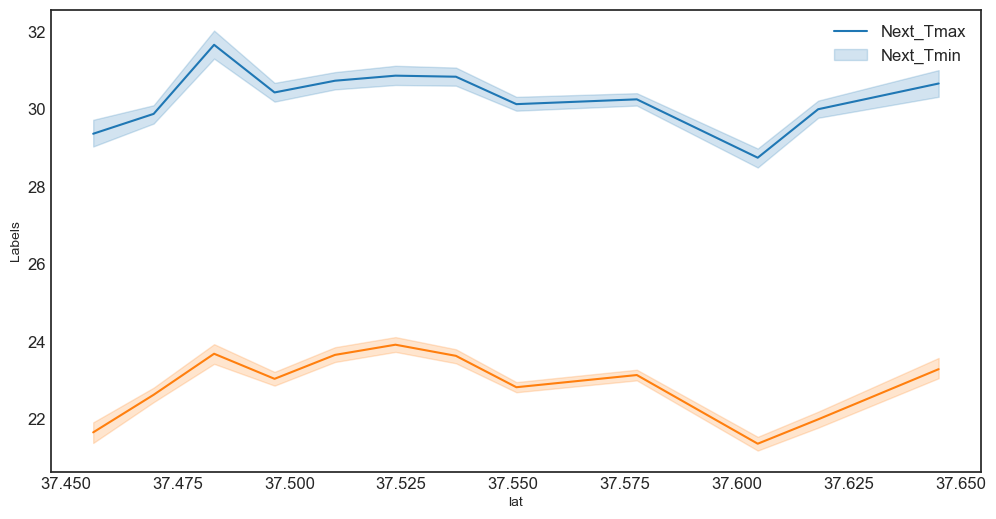

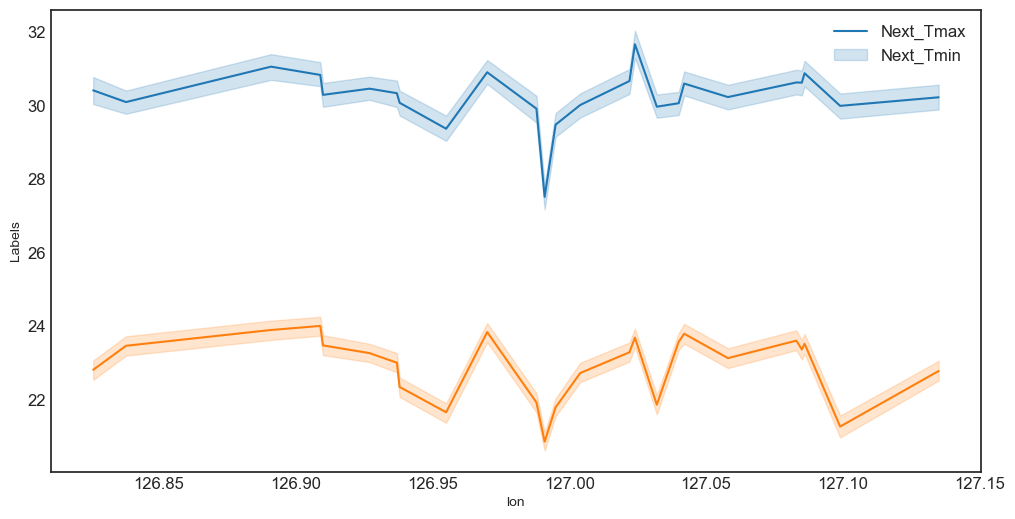

In [30]:
for z in df[feature_columns]:
    plt.figure(figsize=(12,6))
    sns.lineplot(x=df[z], y=label_columns[0], data=df)
    sns.lineplot(x=df[z], y=label_columns[1], data=df)
    plt.ylabel("Labels")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['Next_Tmax', 'Next_Tmin'], fontsize=12)
    plt.show()

## EDA Univariate Analysis

station
Skew : -0.0


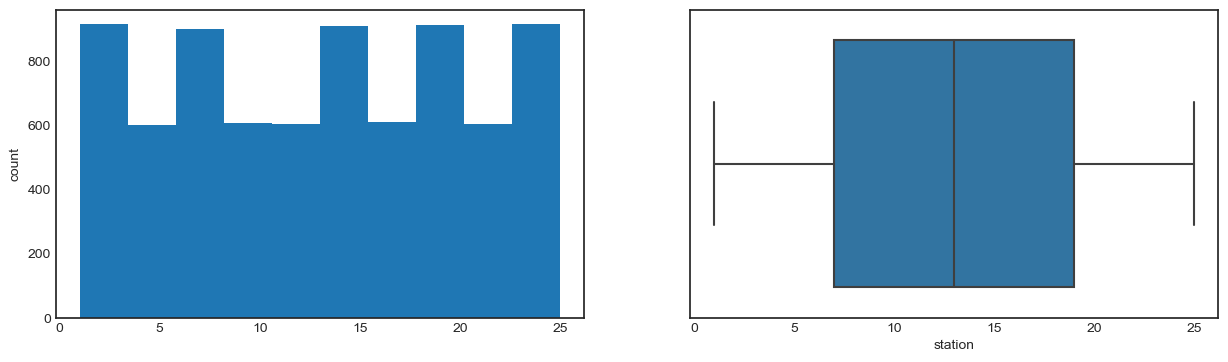

Present_Tmax
Skew : -0.26


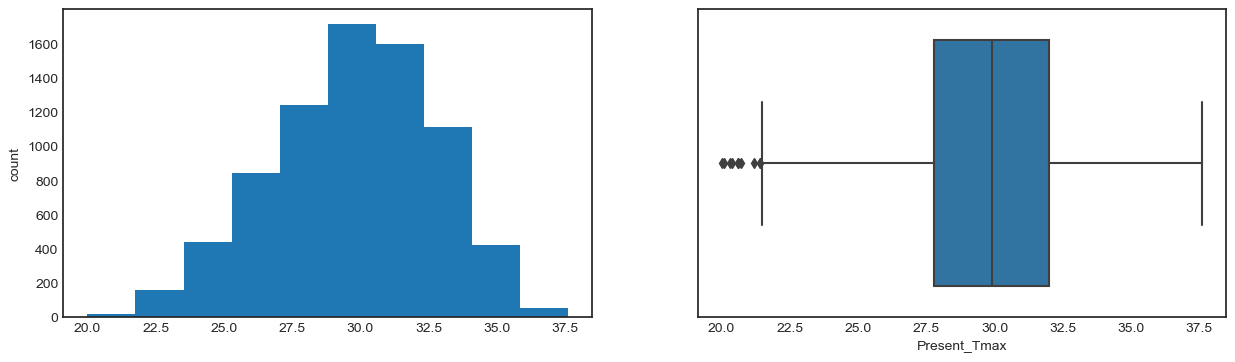

Present_Tmin
Skew : -0.35


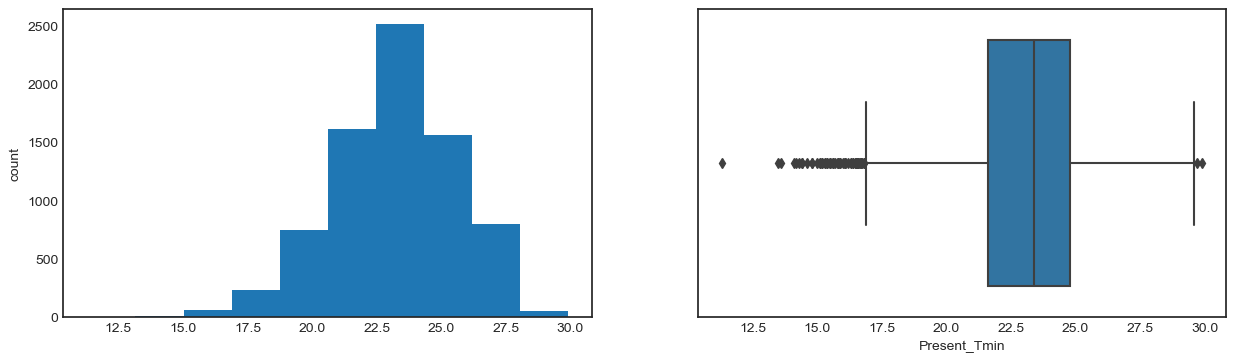

LDAPS_RHmin
Skew : 0.3


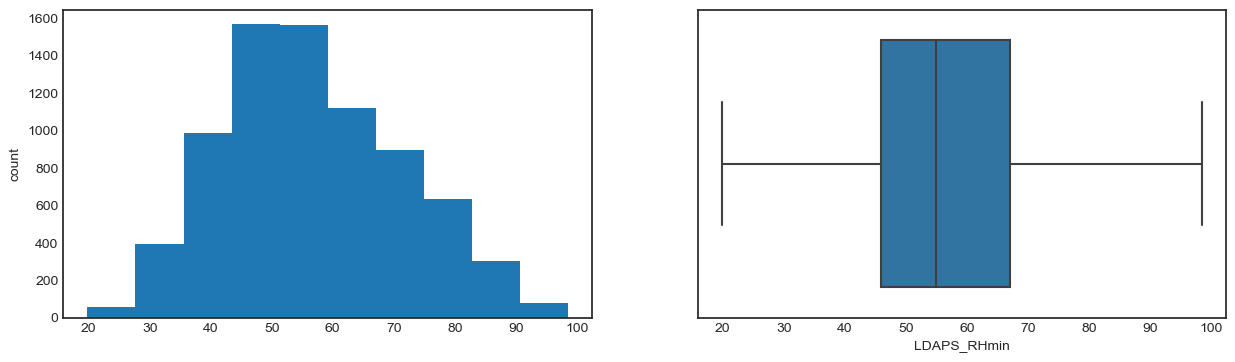

LDAPS_RHmax
Skew : -0.85


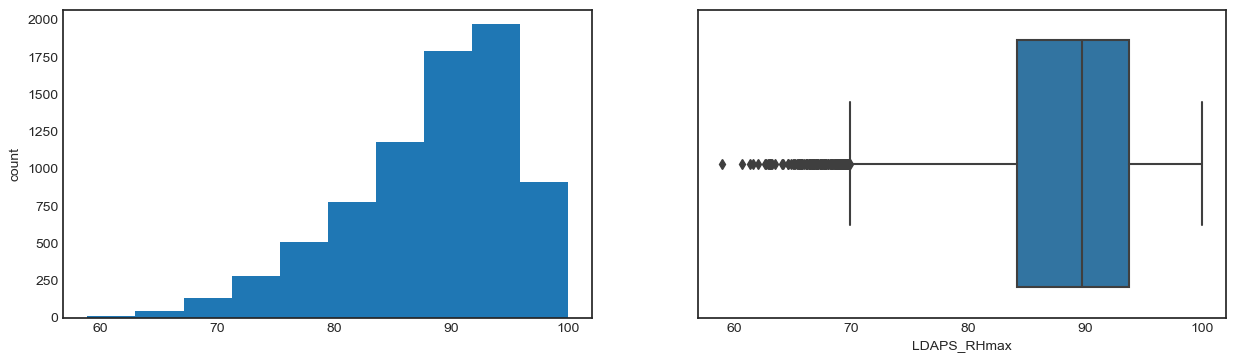

LDAPS_Tmax_lapse
Skew : -0.22


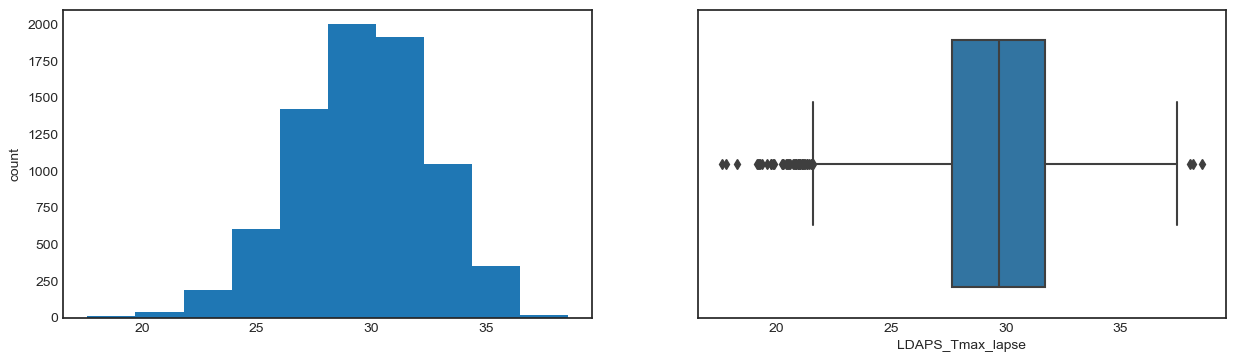

LDAPS_Tmin_lapse
Skew : -0.57


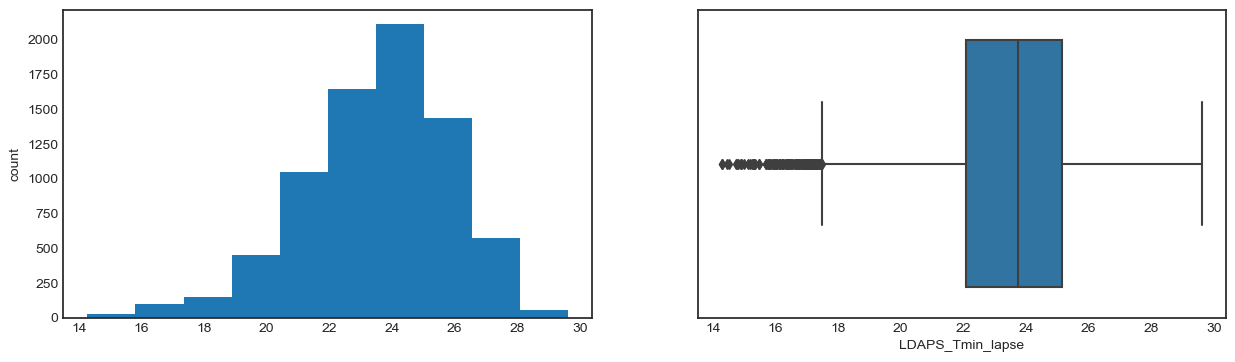

LDAPS_WS
Skew : 1.55


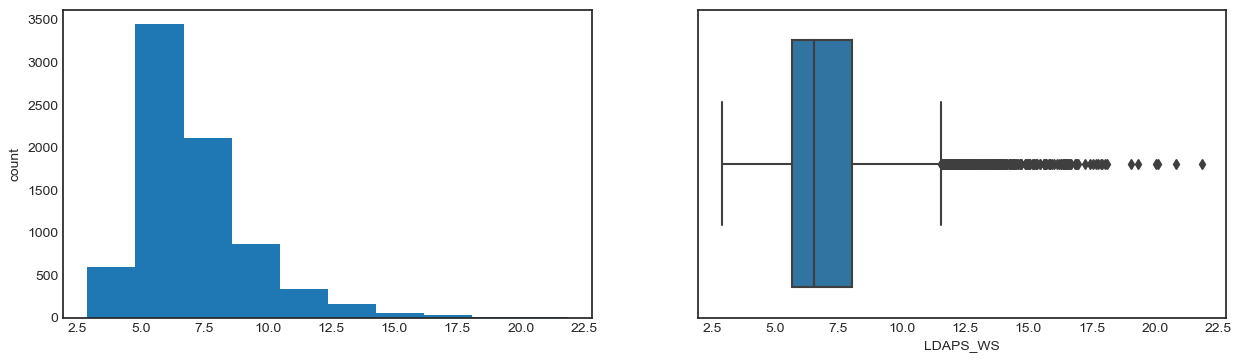

LDAPS_LH
Skew : 0.66


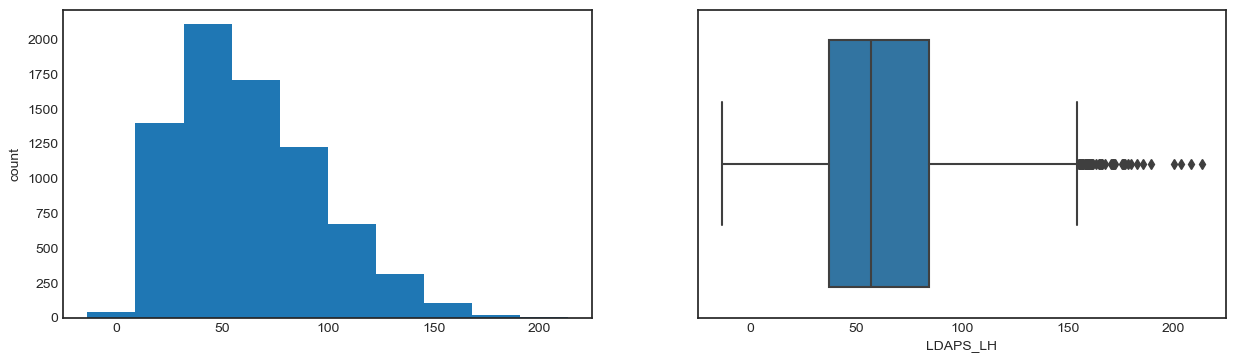

LDAPS_CC1
Skew : 0.46


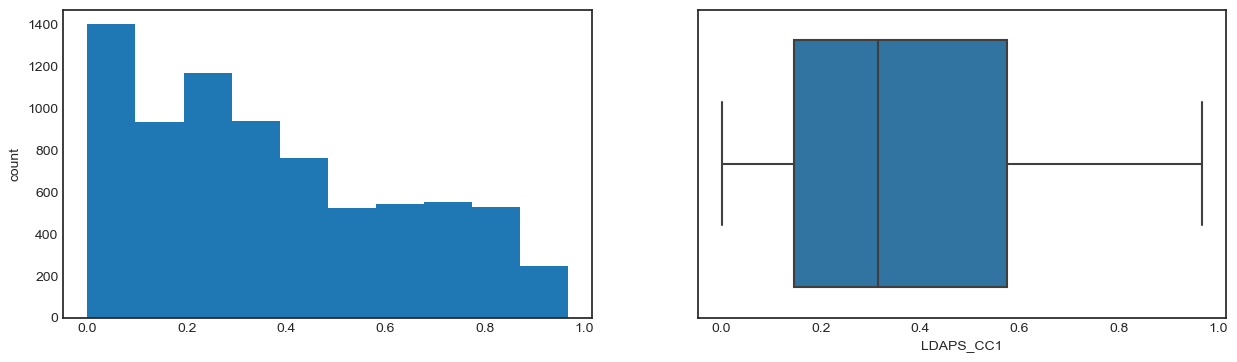

LDAPS_CC2
Skew : 0.47


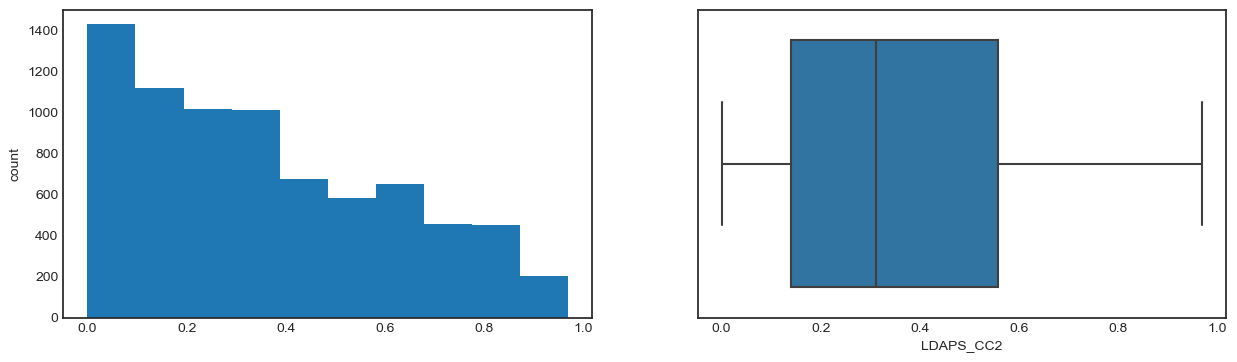

LDAPS_CC3
Skew : 0.64


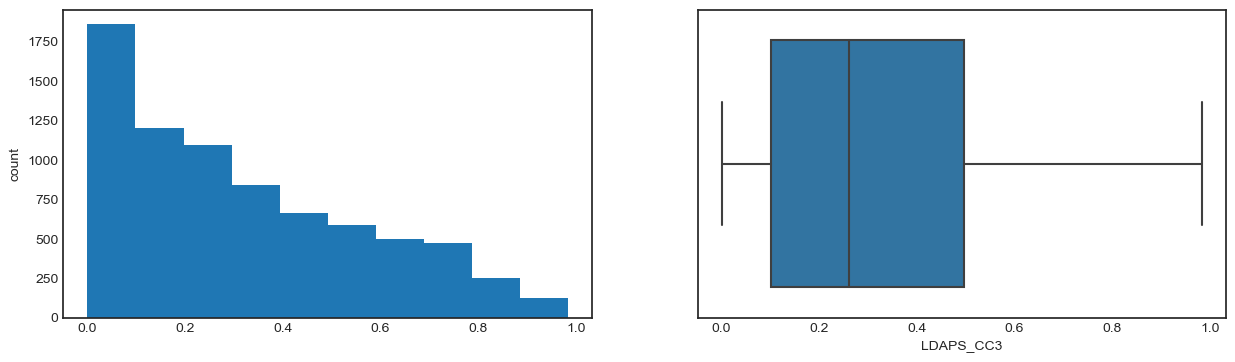

LDAPS_CC4
Skew : 0.66


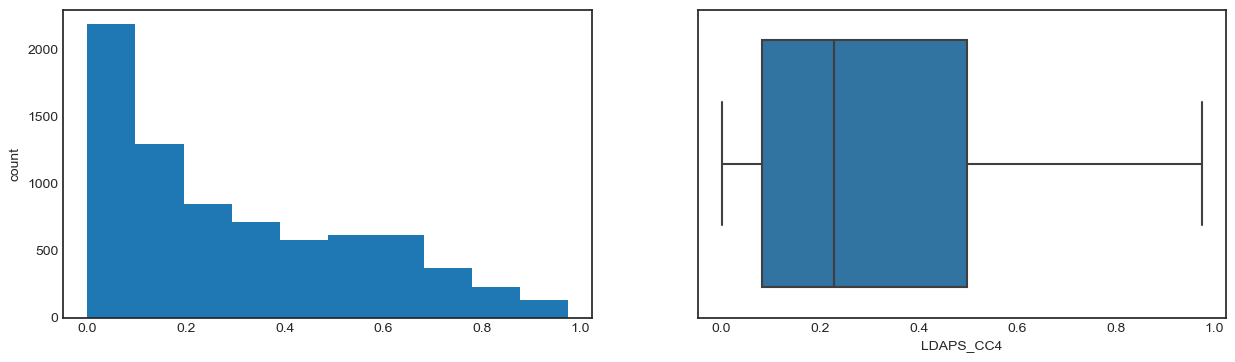

LDAPS_PPT1
Skew : 5.31


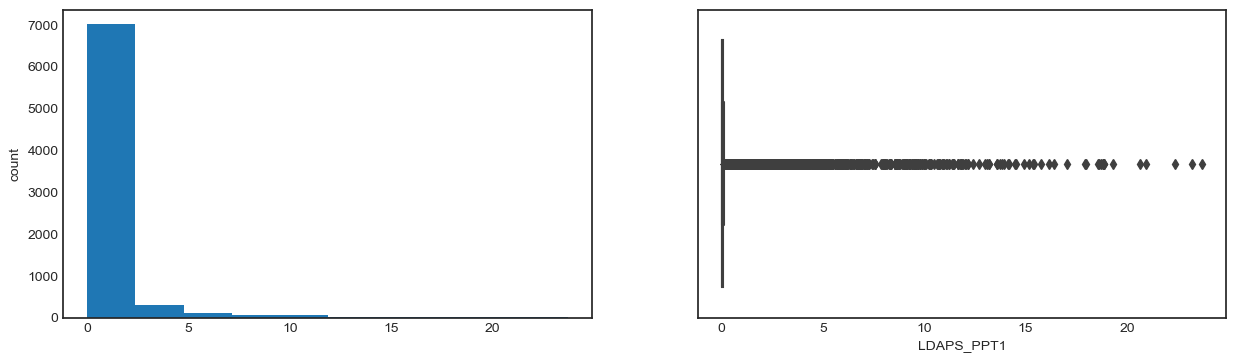

LDAPS_PPT2
Skew : 5.71


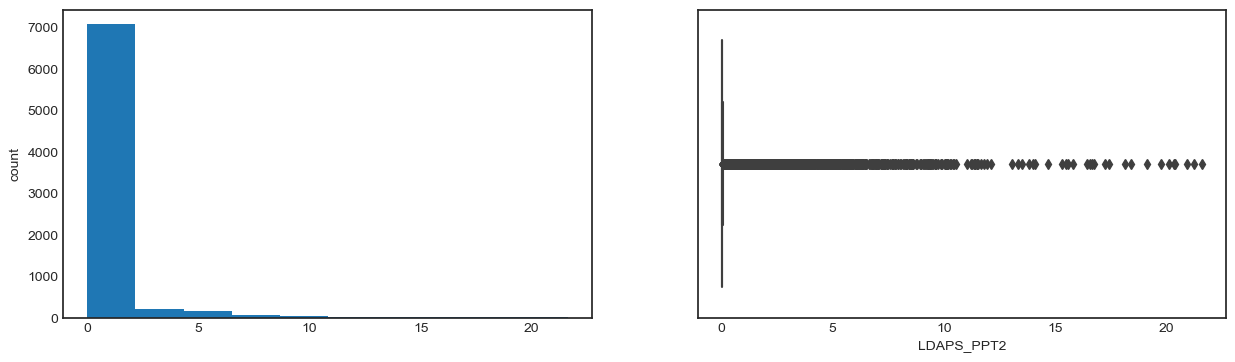

LDAPS_PPT3
Skew : 6.36


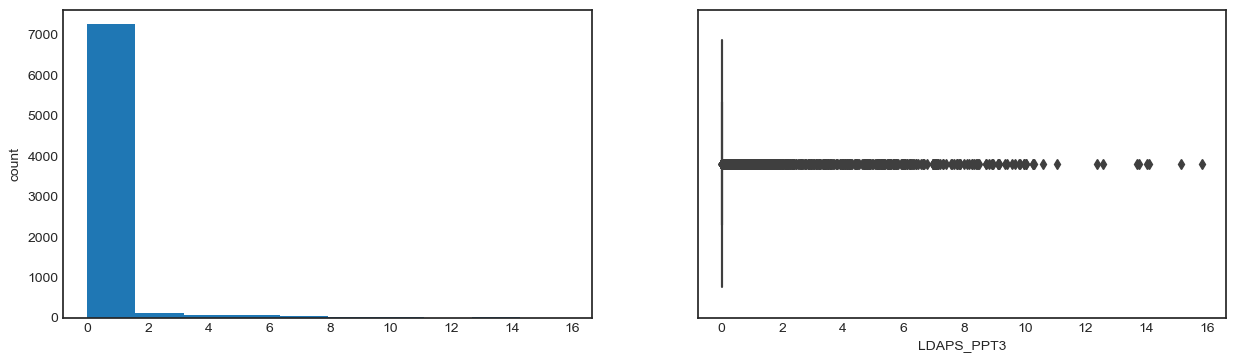

LDAPS_PPT4
Skew : 6.68


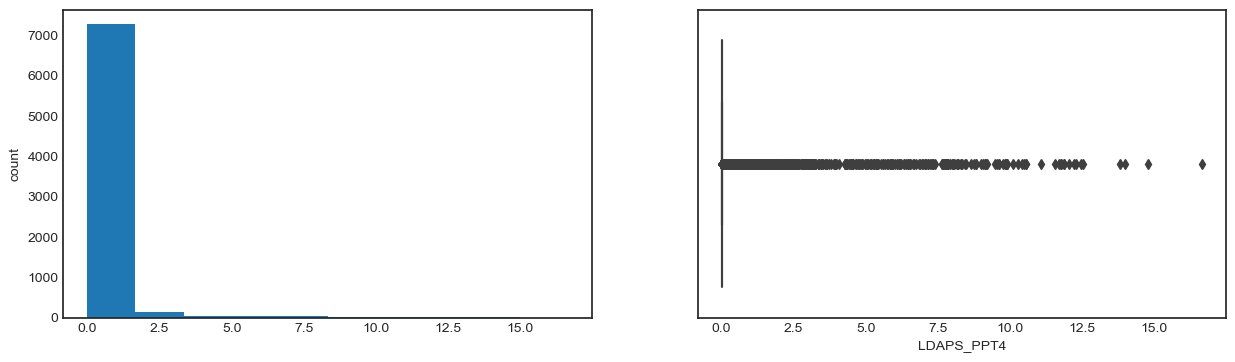

lat
Skew : 0.09


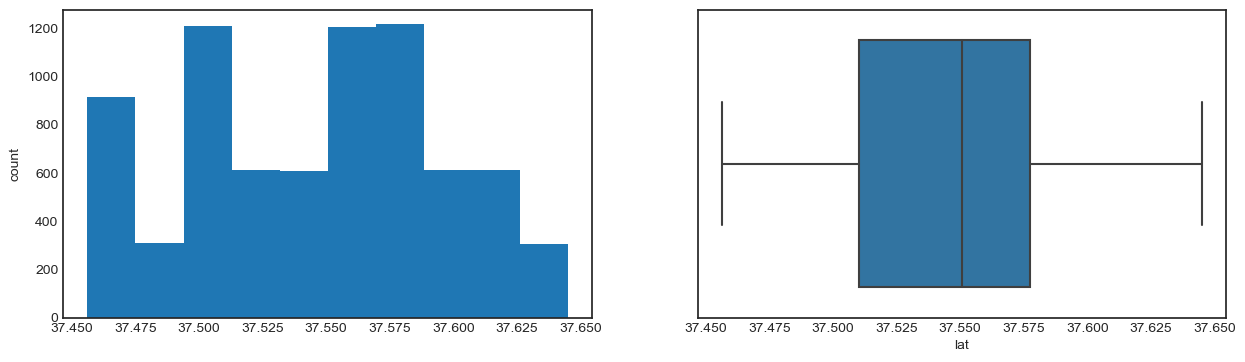

lon
Skew : -0.29


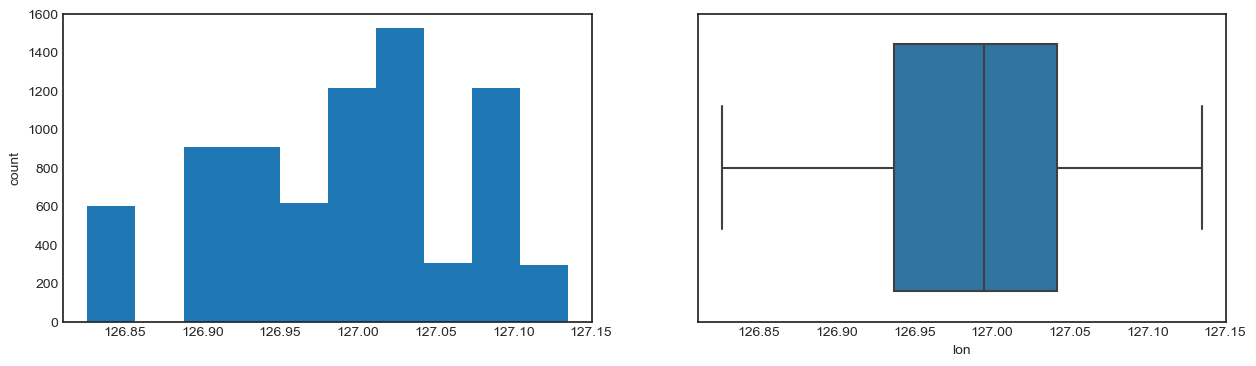

DEM
Skew : 1.72


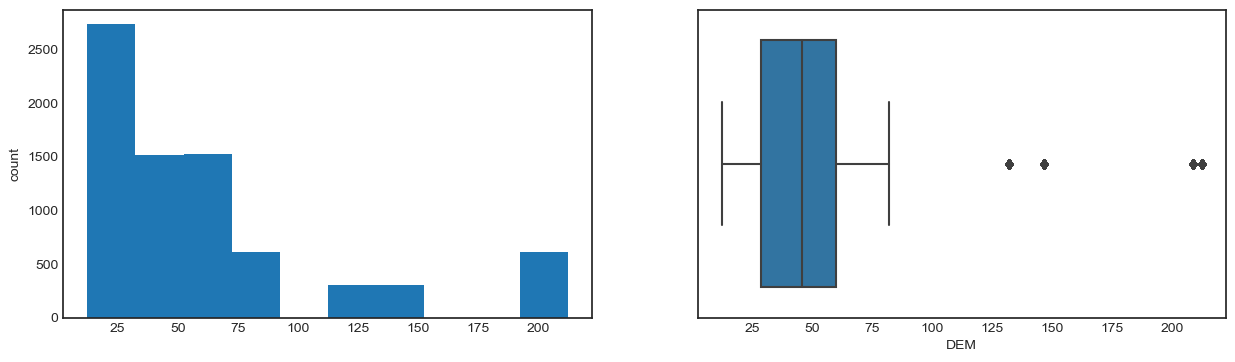

Slope
Skew : 1.56


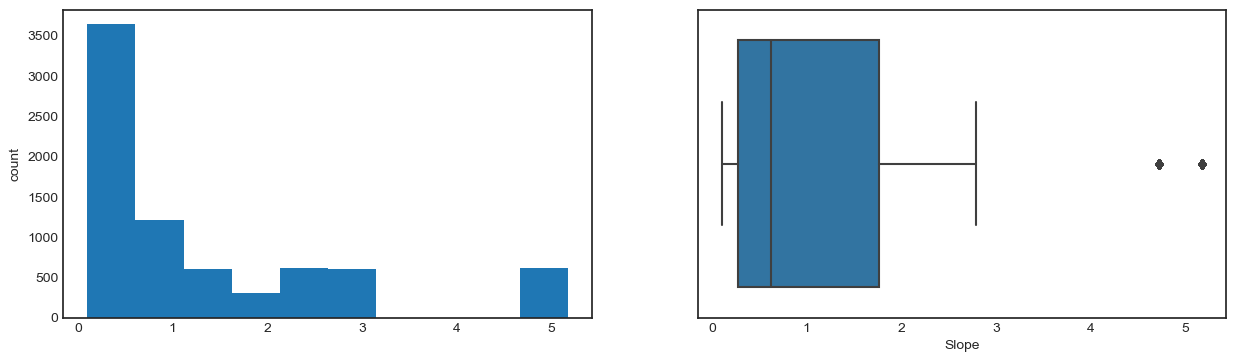

Solar radiation
Skew : -0.52


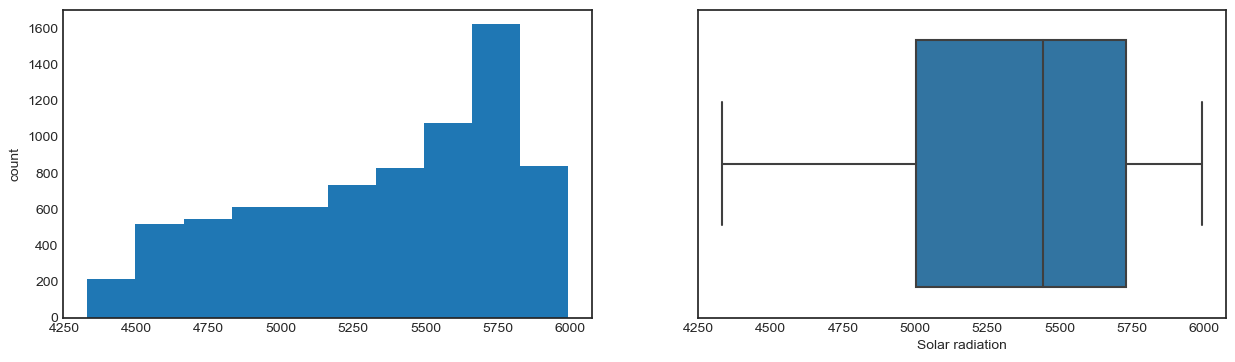

Next_Tmax
Skew : -0.33


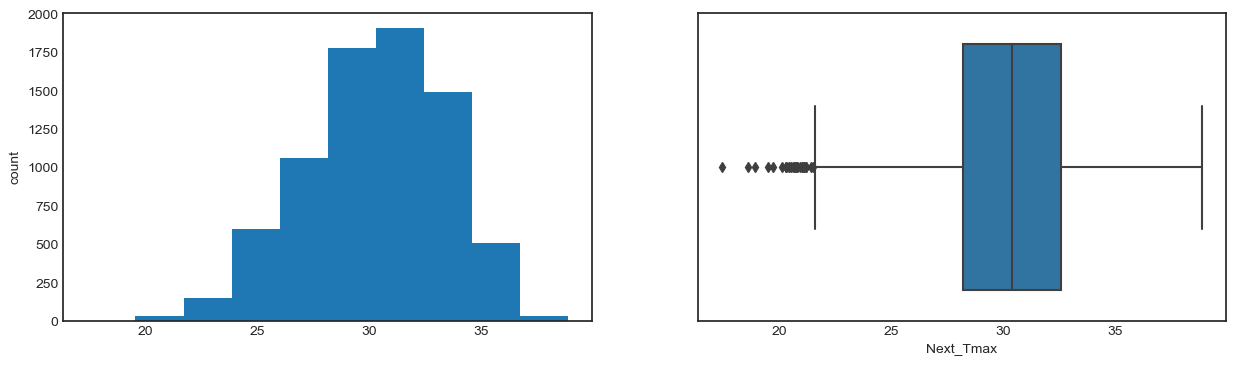

Next_Tmin
Skew : -0.39


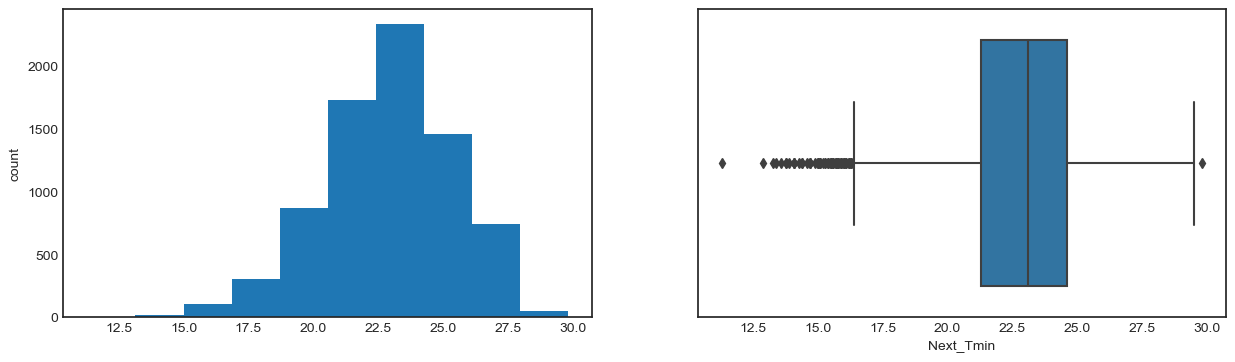

Day
Skew : 0.25


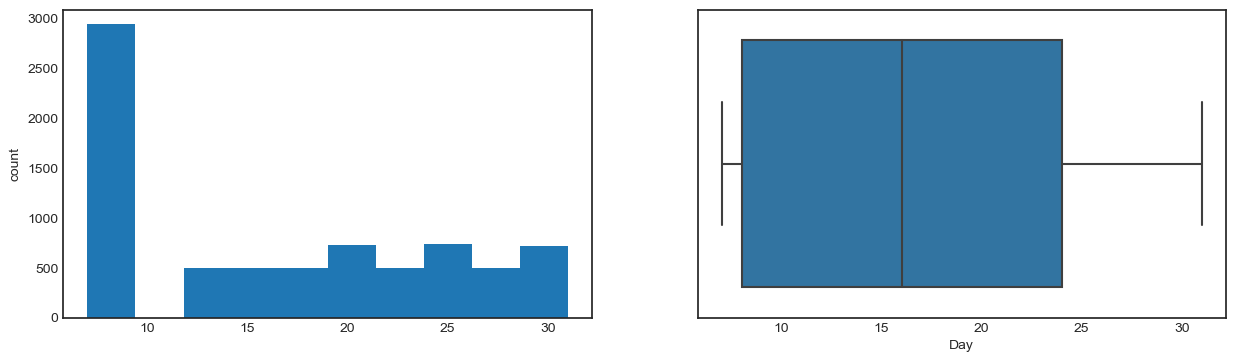

Month
Skew : -0.7


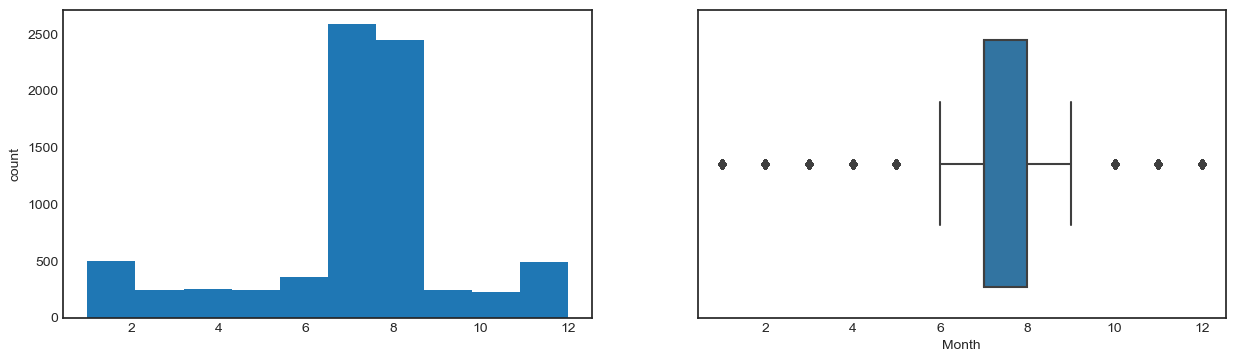

Year
Skew : 0.01


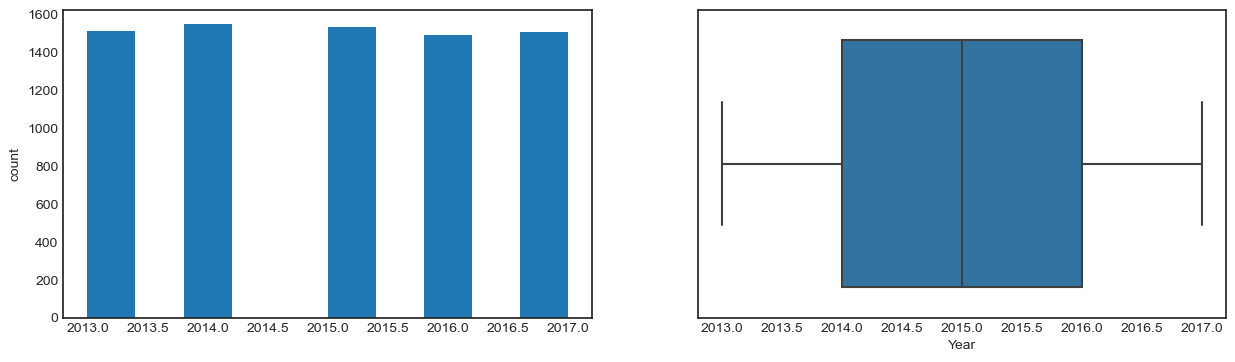

In [31]:
for col in Numerical_data:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

# Checking outliers

In [32]:
### Checking for outliers using boxplot of univariate analysis

station                AxesSubplot(0.125,0.807358;0.227941x0.0726415)
Present_Tmax        AxesSubplot(0.398529,0.807358;0.227941x0.0726415)
Present_Tmin        AxesSubplot(0.672059,0.807358;0.227941x0.0726415)
LDAPS_RHmin            AxesSubplot(0.125,0.720189;0.227941x0.0726415)
LDAPS_RHmax         AxesSubplot(0.398529,0.720189;0.227941x0.0726415)
LDAPS_Tmax_lapse    AxesSubplot(0.672059,0.720189;0.227941x0.0726415)
LDAPS_Tmin_lapse       AxesSubplot(0.125,0.633019;0.227941x0.0726415)
LDAPS_WS            AxesSubplot(0.398529,0.633019;0.227941x0.0726415)
LDAPS_LH            AxesSubplot(0.672059,0.633019;0.227941x0.0726415)
LDAPS_CC1              AxesSubplot(0.125,0.545849;0.227941x0.0726415)
LDAPS_CC2           AxesSubplot(0.398529,0.545849;0.227941x0.0726415)
LDAPS_CC3           AxesSubplot(0.672059,0.545849;0.227941x0.0726415)
LDAPS_CC4              AxesSubplot(0.125,0.458679;0.227941x0.0726415)
LDAPS_PPT1          AxesSubplot(0.398529,0.458679;0.227941x0.0726415)
LDAPS_PPT2          

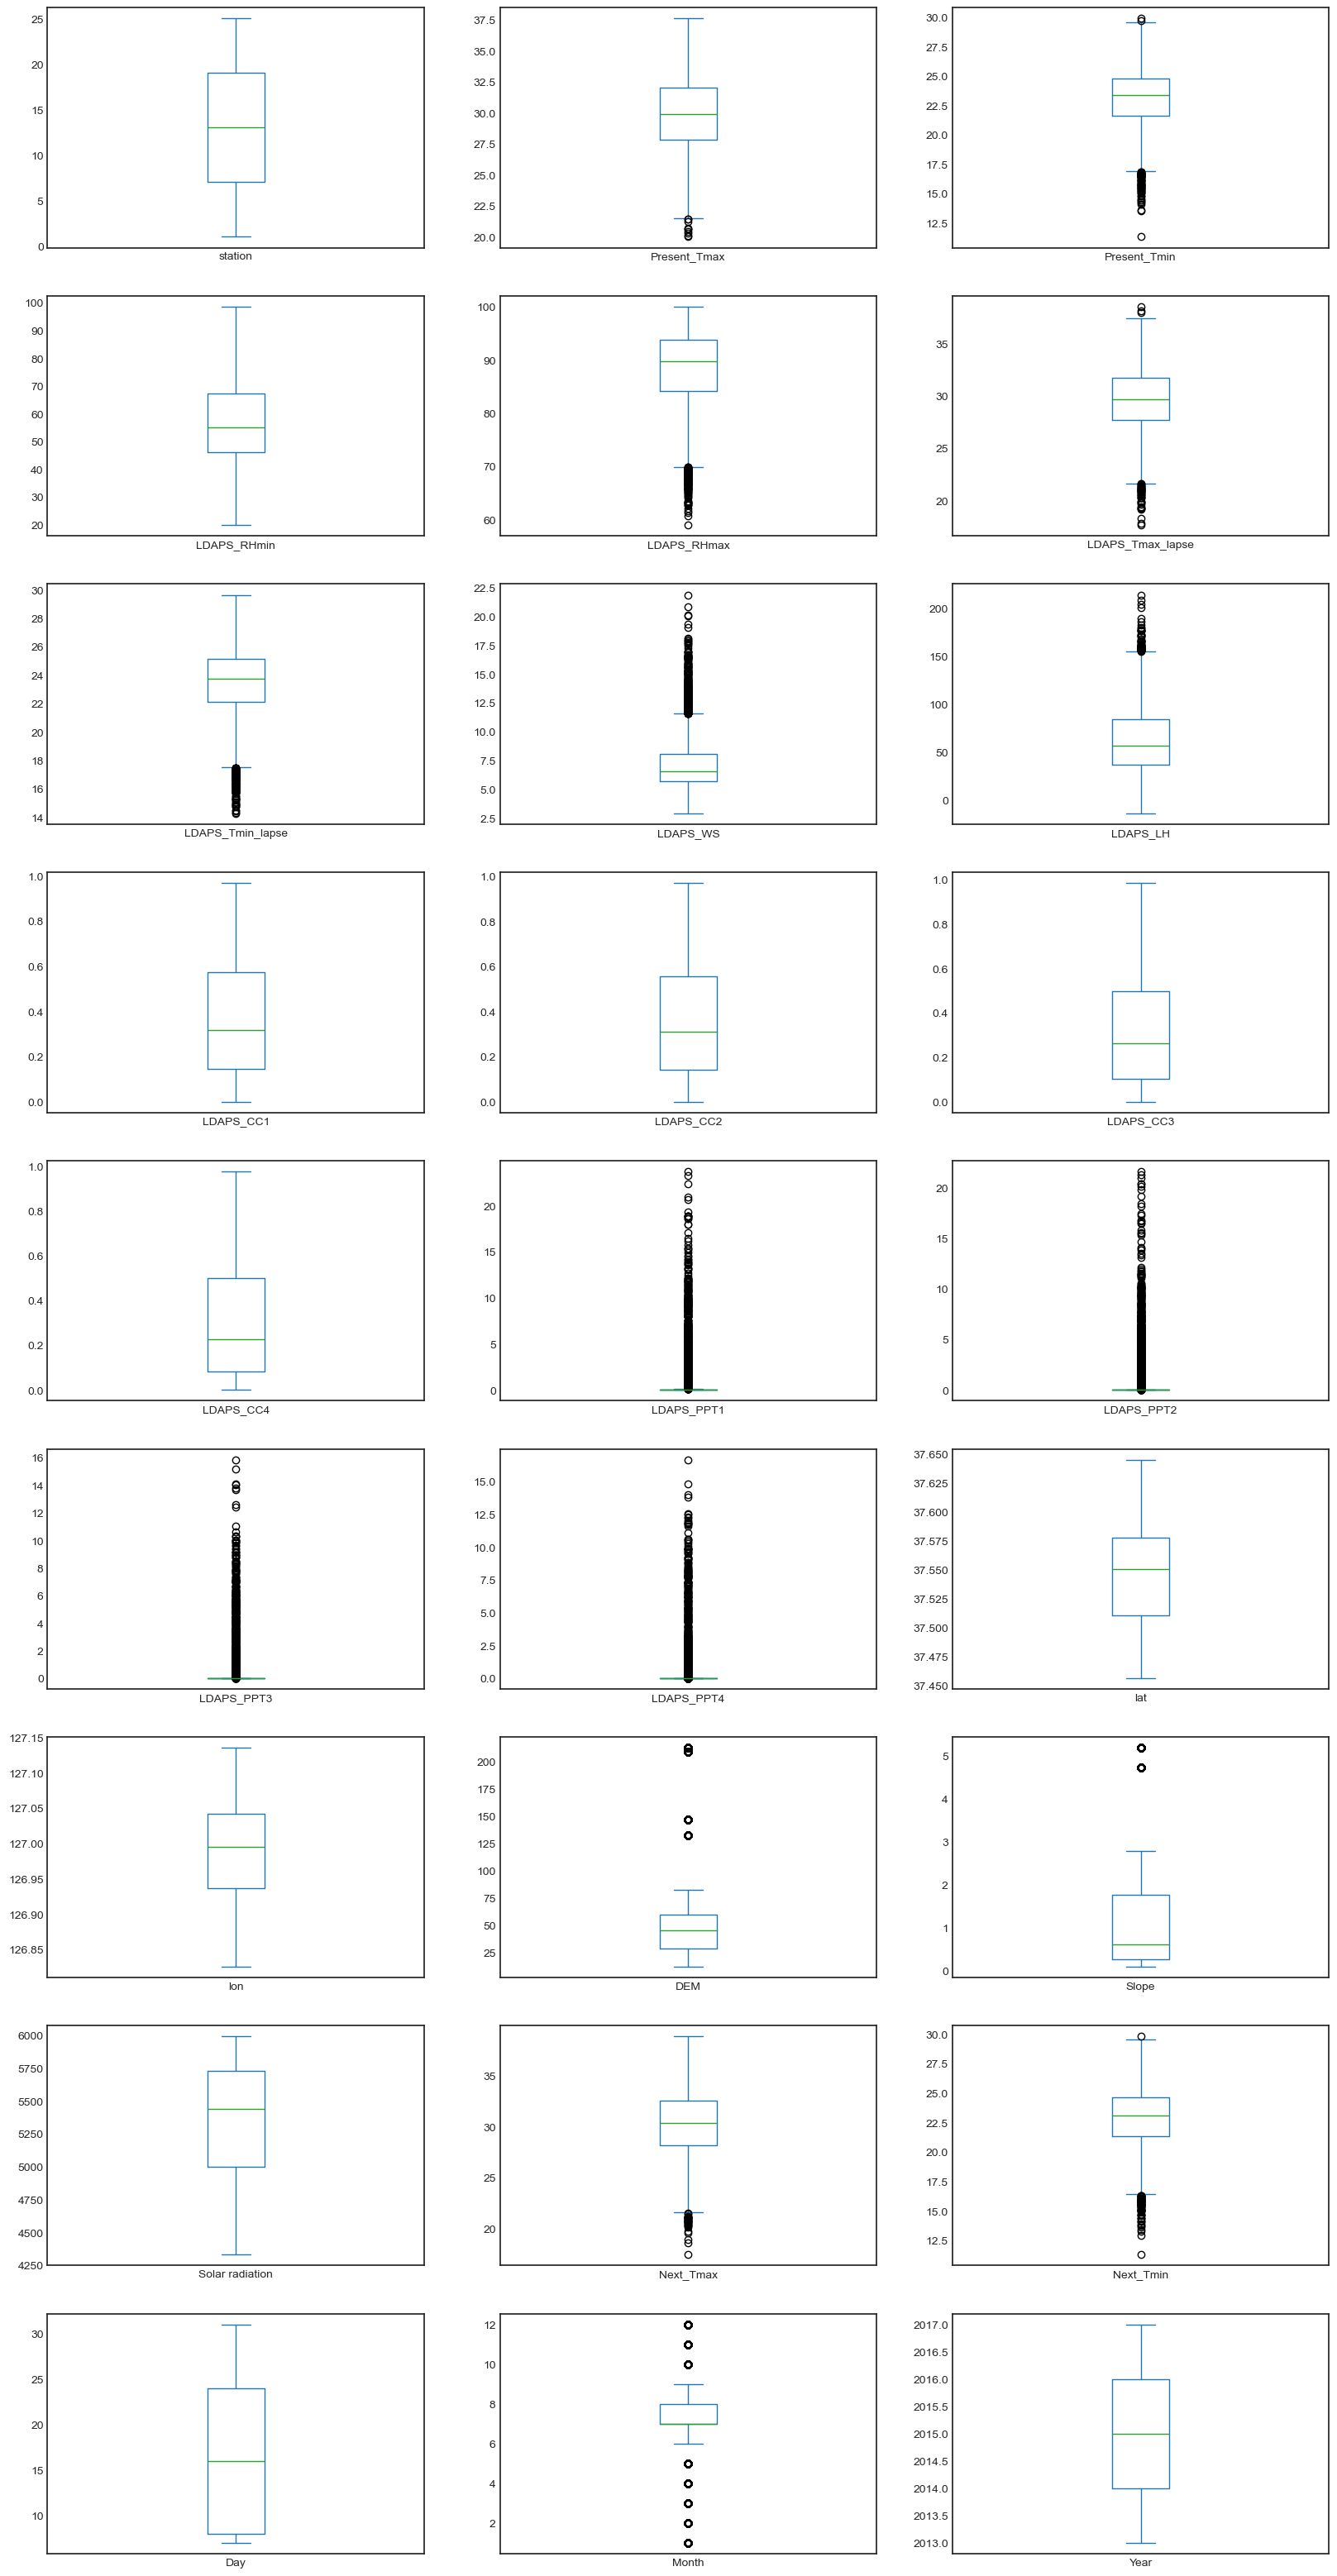

In [33]:
df.plot(kind='box',subplots=True,figsize=(20,40),layout=(9,3))

From above ploting we can see Outliers present in some column
We will now remove the Outliers through ZScore method.

## Removing outliers using Zscore 

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print ("Shape of the dataframe before removing outliers:",df.shape)
print ("Shape of the dataframe after removing outliers:",df1.shape)
print ("Data loss post outlier removal:",((df.shape[0]-df1.shape[0])/df.shape[0]*100),'%')

Shape of the dataframe before removing outliers: (7588, 27)
Shape of the dataframe after removing outliers: (6739, 27)
Data loss post outlier removal: 11.188719030047443 %


If we take threshold value of 3 the data loss is more than the acceptance range but not by a great margin as the acceptable range is 10% so we willcontinue to remove the outliers.

In [35]:
df=df1.copy()

### Skewness

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

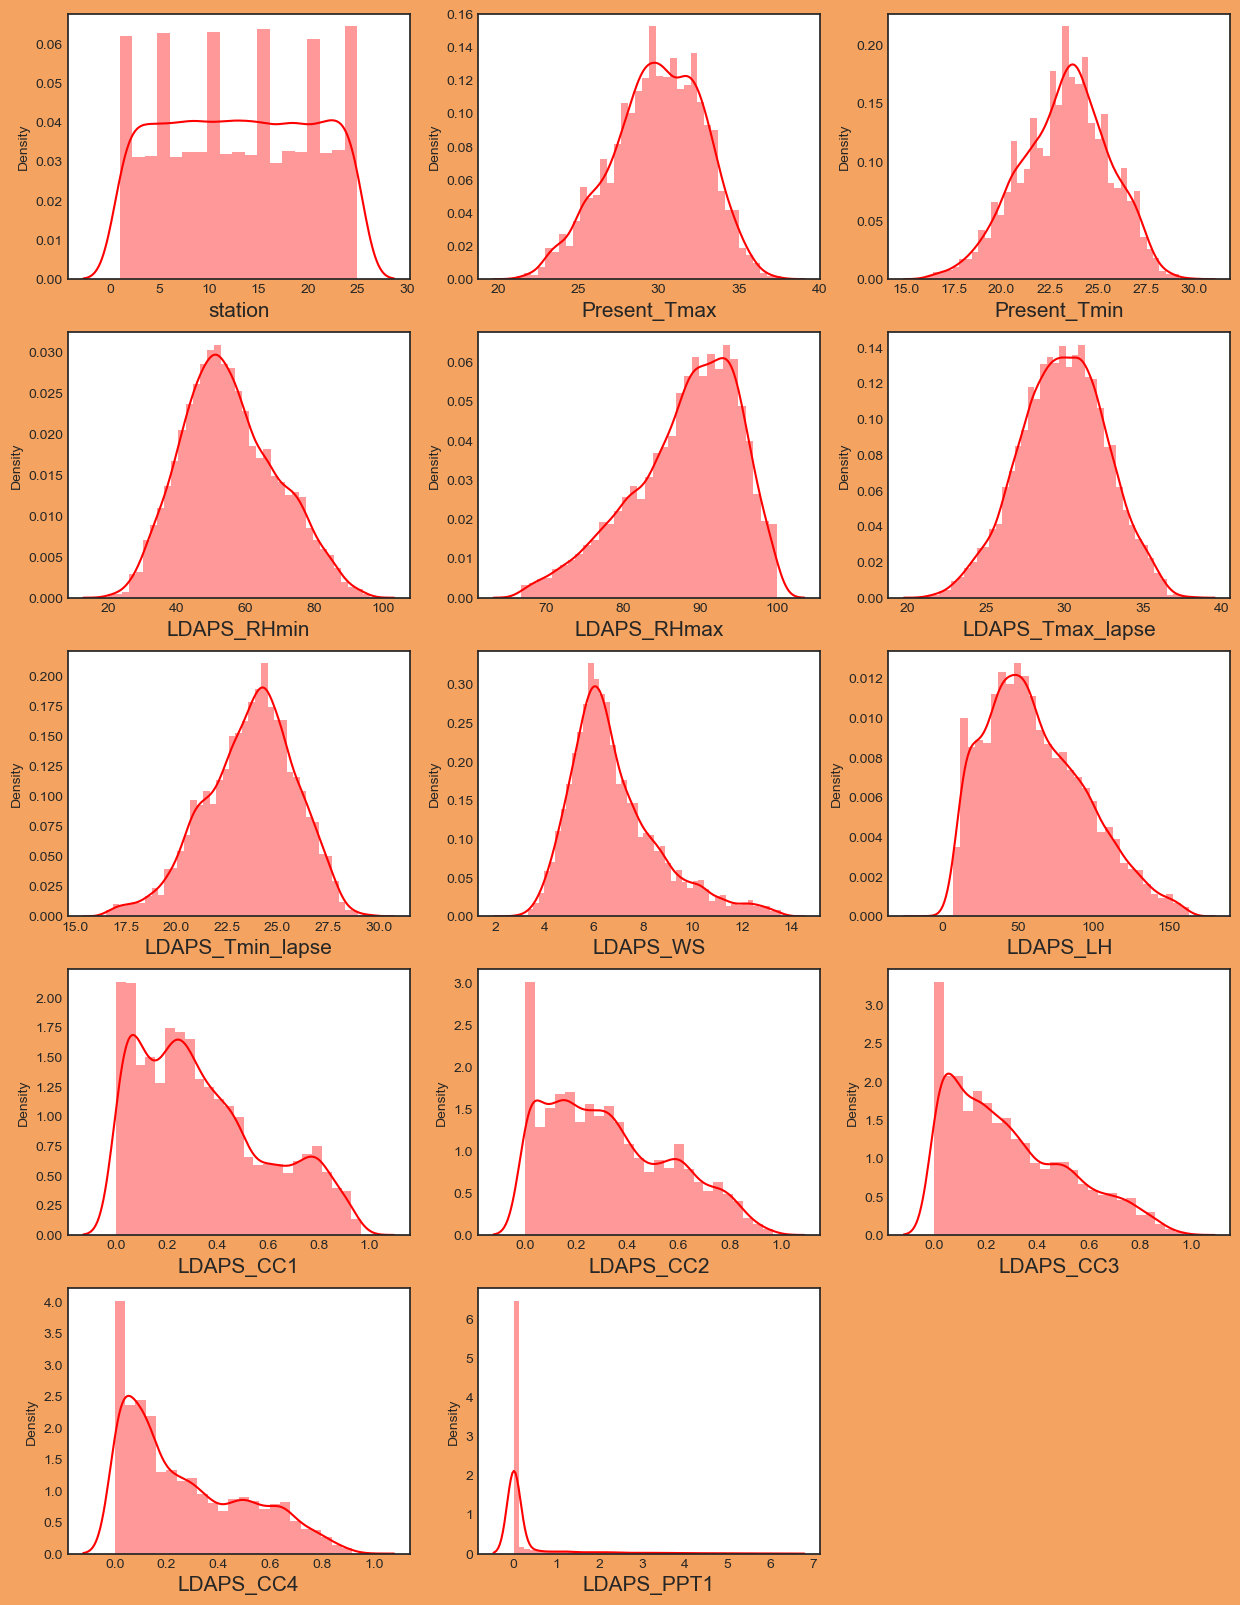

In [36]:
plt.figure(figsize=(15,20),facecolor='sandybrown')
pltno=1

for c in df:
    if pltno<=14:
        ax=plt.subplot(5,3,pltno)
        sns.distplot(df[c],color='r')
        plt.xlabel(c,fontsize=15)
        
    pltno+=1
df1.skew()

From above ploting we can see skewness towards right on many features

In [37]:
df1.skew().sort_values()

LDAPS_RHmax        -0.686083
Month              -0.680725
Solar radiation    -0.520157
LDAPS_Tmin_lapse   -0.379269
lon                -0.277547
Present_Tmax       -0.269936
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Present_Tmin       -0.221250
LDAPS_Tmax_lapse   -0.110563
station            -0.001594
Year                0.025066
lat                 0.106983
Day                 0.256528
LDAPS_RHmin         0.309567
LDAPS_CC2           0.505774
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_WS            1.085685
Slope               1.590130
DEM                 1.764698
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
dtype: float64

We can see that there is some skewness present in the columns , so we will remove skewness from feature columns and try to bring the skewness within the acceptance range which is (-0.5-0.5)

In [40]:
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')
s=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']
x=df1.drop(columns=['Next_Tmin'])
y=df1['Next_Tmin']

In [42]:
df1[s] = yj.fit_transform(df1[s].values)

In [43]:
df1.skew().sort_values()

LDAPS_RHmax        -0.686083
Month              -0.680725
Solar radiation    -0.520157
LDAPS_Tmin_lapse   -0.379269
lon                -0.277547
Present_Tmax       -0.269936
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Present_Tmin       -0.221250
LDAPS_Tmax_lapse   -0.110563
station            -0.001594
Year                0.025066
DEM                 0.038830
lat                 0.106983
Slope               0.233799
Day                 0.256528
LDAPS_RHmin         0.309567
LDAPS_CC2           0.505774
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_WS            1.085685
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
dtype: float64

In [44]:
# Removing skewness using log transformation
df1["LDAPS_PPT4"] = np.log1p(df1["LDAPS_PPT4"])
df1["LDAPS_PPT3"] = np.log1p(df1["LDAPS_PPT3"])
df1["LDAPS_PPT2"] = np.log1p(df1["LDAPS_PPT2"])
df1["LDAPS_PPT1"] = np.log1p(df1["LDAPS_PPT1"])
df1["LDAPS_WS"] = np.log1p(df1["LDAPS_WS"])

In [45]:
df1.skew().sort_values()

LDAPS_RHmax        -0.686083
Month              -0.680725
Solar radiation    -0.520157
LDAPS_Tmin_lapse   -0.379269
lon                -0.277547
Present_Tmax       -0.269936
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Present_Tmin       -0.221250
LDAPS_Tmax_lapse   -0.110563
station            -0.001594
Year                0.025066
DEM                 0.038830
lat                 0.106983
Slope               0.233799
Day                 0.256528
LDAPS_RHmin         0.309567
LDAPS_WS            0.473278
LDAPS_CC2           0.505774
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          1.397252
LDAPS_PPT2          1.597939
LDAPS_PPT3          1.720735
LDAPS_PPT4          2.011611
dtype: float64

In [46]:
# Removing skewness using log transformation
df1["LDAPS_PPT4"] = np.log1p(df1["LDAPS_PPT4"])
df1["LDAPS_PPT3"] = np.log1p(df1["LDAPS_PPT3"])
df1["LDAPS_PPT2"] = np.log1p(df1["LDAPS_PPT2"])
df1["LDAPS_PPT1"] = np.log1p(df1["LDAPS_PPT1"])

In [47]:
df1.skew().sort_values()

LDAPS_RHmax        -0.686083
Month              -0.680725
Solar radiation    -0.520157
LDAPS_Tmin_lapse   -0.379269
lon                -0.277547
Present_Tmax       -0.269936
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Present_Tmin       -0.221250
LDAPS_Tmax_lapse   -0.110563
station            -0.001594
Year                0.025066
DEM                 0.038830
lat                 0.106983
Slope               0.233799
Day                 0.256528
LDAPS_RHmin         0.309567
LDAPS_WS            0.473278
LDAPS_CC2           0.505774
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          1.163061
LDAPS_PPT2          1.390729
LDAPS_PPT3          1.494204
LDAPS_PPT4          1.821758
dtype: float64

We can see that the data is less skewed now

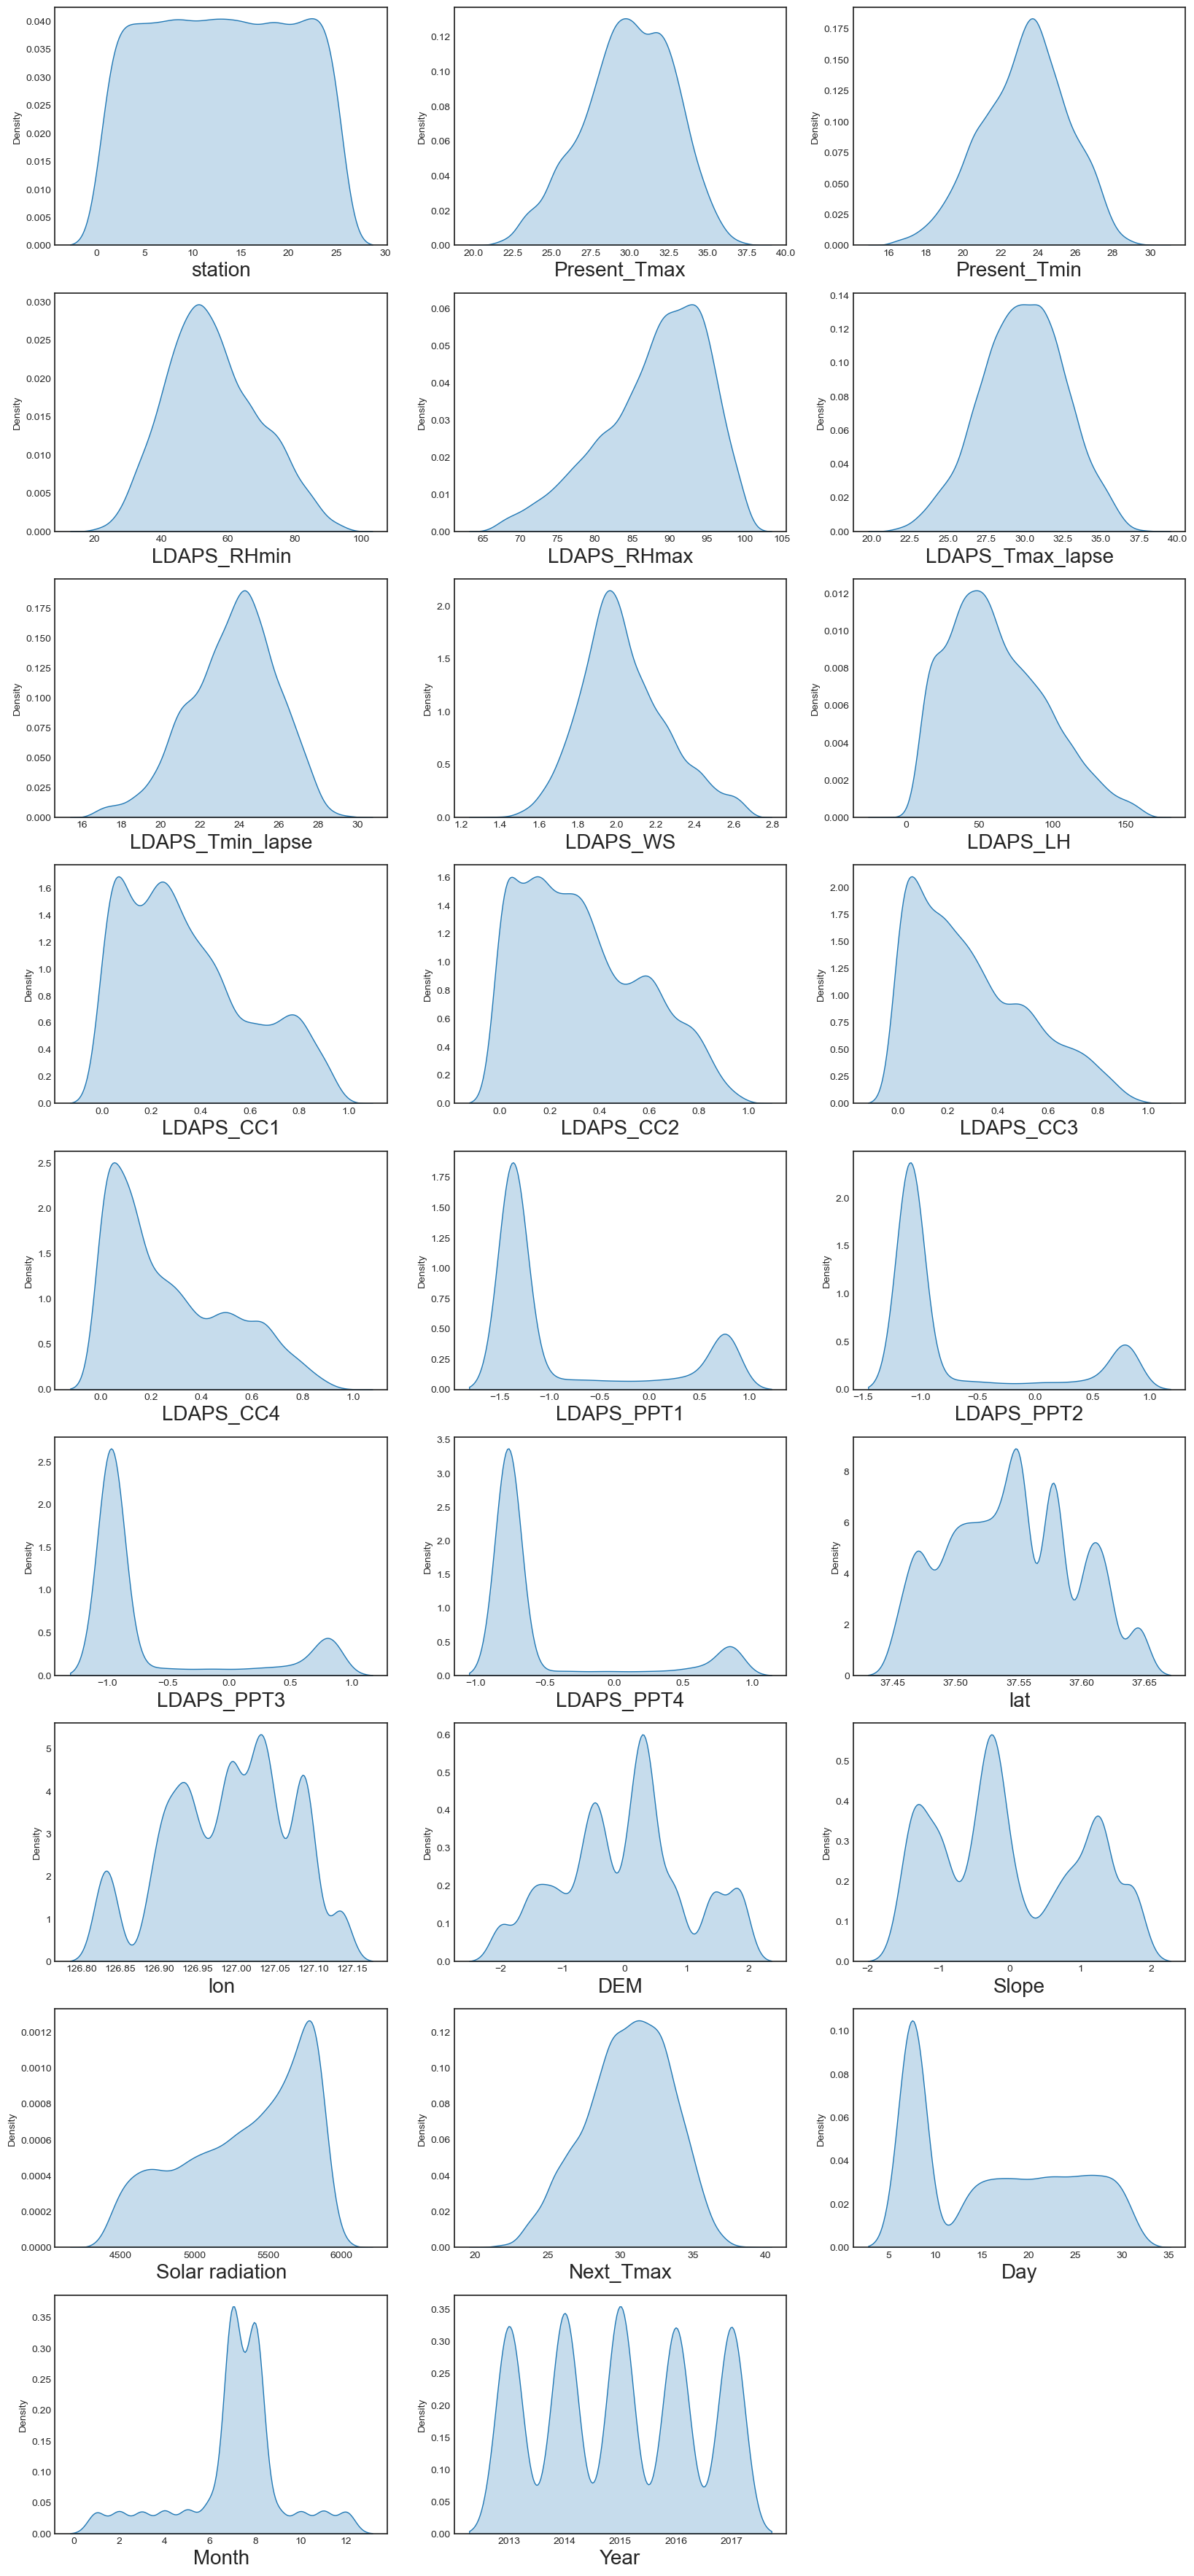

In [54]:
#checking the skewness again through Dist plot.

plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1
features = df1.drop("Next_Tmin", axis=1)
for column in features:
    if plotnumber<=26:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(df1[column], hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

## Standard Scaling

In [55]:
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
x1=pd.DataFrame(scaled_x,columns=x.columns)
x1.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.672719     -0.425704     -0.814460     0.195915     0.437537   
1 -1.533959      0.690215     -0.727785    -0.236604     0.364239   
2 -1.395198      0.585598      0.008945    -0.494494    -0.585732   
3 -1.256438      0.725088      0.052282     0.194767     1.206456   
4 -1.117678      0.515853     -0.597774     0.045667     0.299831   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.662498         -0.289928 -0.020735  0.225115  -0.440130  ...   
1         -0.016693          0.171379 -0.631488 -0.298746  -0.473686  ...   
2          0.070769          0.409475 -0.389607 -1.236867  -0.537958  ...   
3         -0.069787         -0.146681 -0.654162  0.113709  -0.510012  ...   
4         -0.284509         -0.074752 -0.608123  1.377075  -0.768323  ...   

   LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0   -0.237604  1.211166  0.002925  2.828736  1.143153         1.543068   
1   -0.237604  1.211166  0.518733 -0.304406 -0.536509         1.249502   
2   -0.237604  0.671467  0.845830 -0.518594 -0.719941         1.235827   
3   -0.237604  2.018714  0.392926 -0.286576  0.958094         1.220170   
4   -0.237604  0.133768  1.814542 -0.486225 -0.542870         1.226317   

   Next_Tmax       Day     Month      Year  
0  -0.489951  1.674045 -0.479519 -1.421473  
1  -0.011135  1.674045 -0.479519 -1.421473  
2   0.194072  1.674045 -0.479519 -1.421473  
3   0.399279  1.674045 -0.479519 -1.421473  
4   0.228274  1.674045 -0.479519 -1.421473  

[5 rows x 26 columns]

scaled data using standard scaler.

## Checking Multicollinearity using VIF

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(x1.values,i)
                    for i in range(len(x1.columns))]
vif["features"]=x1.columns
vif

Vif values          features
0     1.240254           station
1     2.857732      Present_Tmax
2     3.147128      Present_Tmin
3     5.978959       LDAPS_RHmin
4     2.294504       LDAPS_RHmax
5     8.312812  LDAPS_Tmax_lapse
6     7.064391  LDAPS_Tmin_lapse
7     1.277185          LDAPS_WS
8     1.594456          LDAPS_LH
9     3.571792         LDAPS_CC1
10    4.762013         LDAPS_CC2
11    5.005510         LDAPS_CC3
12    2.801821         LDAPS_CC4
13    1.562180        LDAPS_PPT1
14    1.420116        LDAPS_PPT2
15    1.257715        LDAPS_PPT3
16    1.284132        LDAPS_PPT4
17    1.227386               lat
18    1.181985               lon
19    3.153545               DEM
20    2.967444             Slope
21    1.509760   Solar radiation
22    4.239032         Next_Tmax
23    1.267576               Day
24    1.134477             Month
25    1.151906              Year

As all the VIF values are less than 10 we can proceed with the data.

## Selecting the best random state 

In [64]:
models_reg=[LinearRegression(),Ridge(),Lasso(),SVR(),XGBRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor()]

In [65]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size = .25, random_state=i)
    for m in models_reg:
        m.fit(xtrain,ytrain)
        pred = m.predict(xtest)
        acc = r2_score(ytest,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9365609130135665 on Random State: 36


So the best random state is 36

In [67]:
 x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = .25, random_state=36)

## Every regression model with their metrics

In [68]:
for m in models_reg:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,x1,y)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : 0.8396273455257274
Mean absolute error:  0.7473359806875688
Mean squared error:  0.8885566209685202
Cross Validation Score= 0.7913272079186007 

 For Ridge() 
R2 score : 0.8396287526457645
Mean absolute error:  0.7473395521297129
Mean squared error:  0.8885488247152897
Cross Validation Score= 0.7913520253645476 

 For Lasso() 
R2 score : 0.5969663762396531
Mean absolute error:  1.2021409697232206
Mean squared error:  2.2330377709289704
Cross Validation Score= 0.5335445672668998 

 For SVR() 
R2 score : 0.9200675357710113
Mean absolute error:  0.5069505057992274
Mean squared error:  0.44287176360475594
Cross Validation Score= 0.7460597324924861 

 For XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_p

From above we see that random forest and XGboosting are almost working with the same accuracy as suggested by r2 and cross validation score . We will be advancing with Random forest as it has almost the same accuracy but with less error.

## HyperParameter Tuning

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForestRegressor
gcs = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(gcs, param, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [71]:
grid_search.best_score_

0.9075228029829496

In [72]:
fmodel=RandomForestRegressor(max_features='sqrt',min_samples_split=2,max_depth=None,n_estimators=200)
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

91.4042603560406


Model r2 score is 91.40%

## Plotting the best fit line

Text(0.5, 1.0, 'Best Fit Line')

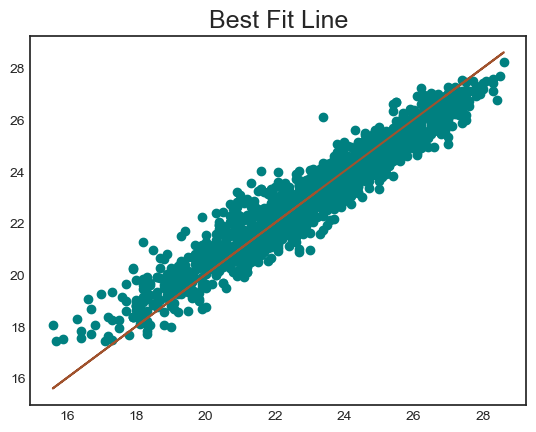

In [74]:
plt.scatter(x=y_test,y=pred,color='teal')
plt.plot(y_test,y_test,color='sienna')
plt.title('Best Fit Line',fontsize=18)

## Saving the model

In [75]:
import joblib
joblib.dump(fmodel,'Temp_Pred_Next_Tmin.obj')

['Temp_Pred_Next_Tmin.obj']

In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [77]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
testing_data_prediction = model.predict(x_test)

In [79]:
from sklearn import metrics
score = metrics.r2_score(y_test,testing_data_prediction)
score

0.9050107383925559

In [85]:
pd.set_option('display.max_columns', None)
x1.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.672719     -0.425704     -0.814460     0.195915     0.437537   
1 -1.533959      0.690215     -0.727785    -0.236604     0.364239   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0         -0.662498         -0.289928 -0.020735  0.225115  -0.440130   
1         -0.016693          0.171379 -0.631488 -0.298746  -0.473686   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0  -0.526550  -0.568017  -0.614602   -0.341277   -0.277993   -0.258829   
1  -0.327568  -0.577779  -0.628231   -0.341277   -0.277993   -0.258829   

   LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0   -0.237604  1.211166  0.002925  2.828736  1.143153         1.543068   
1   -0.237604  1.211166  0.518733 -0.304406 -0.536509         1.249502   

   Next_Tmax       Day     Month      Year  
0  -0.489951  1.674045 -0.479519 -1.421473  
1  -0.011135  1.674045 -0.479519 -1.421473

In [84]:
pd.set_option('display.max_columns', None)
df.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887  69.451805   0.233947   
1         29.850689         24.035009  5.691890  51.937448   0.225508   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   

   Next_Tmin   Day  Month    Year  
0       21.2  30.0    6.0  2013.0  
1       22.5  30.0    6.0  2013.0

In [88]:
#BULDING THE PREDICTION SYSTEM
input_data = (1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,30.0,6.0,2013.0)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = fmodel.predict(input_data_reshaped)
print('Predicted Next_Tmin : ',str(prediction))

Predicted Next_Tmin :  [25.936]


### Predicting the saved model

In [91]:
# Loading the saved model
model=joblib.load("Temp_Pred_Next_Tmin.obj")

#Prediction
prediction = fmodel.predict(x_test)
prediction

array([22.703 , 21.0025, 22.849 , ..., 21.4415, 23.9155, 26.2005])

In [92]:
prediction_=pd.DataFrame({'predicted values':prediction,'actual values':y_test})
prediction_

predicted values  actual values
2892           22.7030           23.2
4637           21.0025           21.7
6518           22.8490           22.7
4186           22.4160           23.0
972            26.8955           27.4
...                ...            ...
2251           21.8240           22.5
4179           22.5615           22.8
1622           21.4415           21.3
4872           23.9155           24.0
872            26.2005           26.9

[1685 rows x 2 columns]

### predicted value is almost closer to actual values and it gives 91.40% accuracy overall as per our R2 score

# Now we will build the model by taking column 'Next_Tmax' as our target variable

In [95]:
x=df1.drop(columns=['Next_Tmax'])
y=df1['Next_Tmax']

In [96]:
sc = StandardScaler()
scaledx = sc.fit_transform(x)
x2=pd.DataFrame(scaledx,columns=x.columns)

In [97]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size = .25, random_state=i)
    for m in models_reg:
        m.fit(xtrain,ytrain)
        pred = m.predict(xtest)
        acc = r2_score(ytest,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.930012273065657 on Random State: 11


So the best random state is 11

In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.25,random_state=11)

## Every regression model with their metrics

In [99]:
for m in models_reg:
    m.fit(xtrain,ytrain)
    mpred=m.predict(xtest)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(ytest, mpred))
    print("Mean absolute error: ", mean_absolute_error(ytest,mpred))
    print("Mean squared error: ", mean_squared_error(ytest,mpred))
    cvs=cross_val_score(m,x2,y)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : 0.7888499052400312
Mean absolute error:  1.0332018849965658
Mean squared error:  1.843816570195937
Cross Validation Score= 0.6842781732002043 

 For Ridge() 
R2 score : 0.7888573330086677
Mean absolute error:  1.0331793385293981
Mean squared error:  1.8437517090226225
Cross Validation Score= 0.68433713409129 

 For Lasso() 
R2 score : 0.547033183660881
Mean absolute error:  1.5733703005429756
Mean squared error:  3.9554219602145664
Cross Validation Score= 0.4966272403537687 

 For SVR() 
R2 score : 0.8937744614453604
Mean absolute error:  0.6903045220649477
Mean squared error:  0.9275885402167685
Cross Validation Score= 0.6798093599757999 

 For XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy

From above we see that random forest and XGboosting are almost working with the same accuracy as suggested by r2 and cross validation score . We will be advancing with Random forest as it has almost the same accuracy but with less error.

## HyperParameter Tuning

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForestRegressor
gcs = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(gcs, param, cv=5)
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [148]:
fmodel=RandomForestRegressor(max_features='sqrt',min_samples_split=2,max_depth=20,n_estimators=200)
fmodel.fit(xtrain,ytrain)
pred2=fmodel.predict(xtest)
acc=r2_score(ytest,pred2)
print(acc*100)

91.68046894478849


### accuracy is 91.68%

## Plotting the best fit line

Text(0.5, 1.0, 'Best Fit Line')

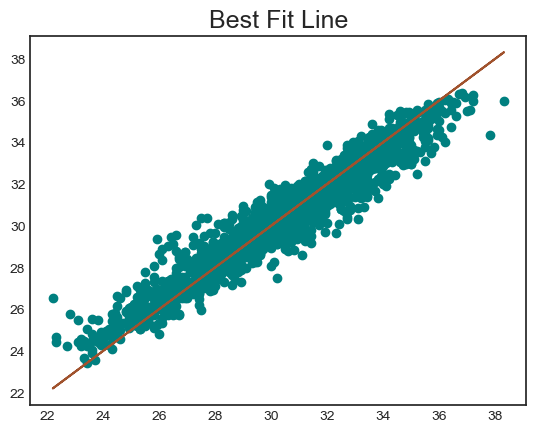

In [149]:
plt.scatter(x=ytest,y=pred2,color='teal')
plt.plot(ytest,ytest,color='sienna')
plt.title('Best Fit Line',fontsize=18)

In [104]:
import joblib
joblib.dump(fmodel,'Temp_Pred_Next_Tmax.obj')

['Temp_Pred_Next_Tmax.obj']

In [105]:
from sklearn.ensemble import RandomForestRegressor
fmodel = RandomForestRegressor()

In [150]:
fmodel.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)

In [151]:
testing_data_prediction = fmodel.predict(xtest)

In [152]:
from sklearn import metrics
score = metrics.r2_score(ytest,testing_data_prediction)
score

0.9162837092519436

In [153]:
pd.set_option('display.max_columns', None)
x2.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.672719     -0.425704     -0.814460     0.195915     0.437537   
1 -1.533959      0.690215     -0.727785    -0.236604     0.364239   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0         -0.662498         -0.289928  0.092116  0.225115  -0.440130   
1         -0.016693          0.171379 -0.612887 -0.298746  -0.473686   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0  -0.526550  -0.568017  -0.614602   -0.622415   -0.562971   -0.540085   
1  -0.327568  -0.577779  -0.628231   -0.622415   -0.562971   -0.540085   

   LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0   -0.470186  1.211166  0.002925  1.854393  1.327776         1.543068   
1   -0.470186  1.211166  0.518733  0.069704 -0.375858         1.249502   

   Next_Tmin       Day     Month      Year  
0  -0.790587  1.674045 -0.479519 -1.421473  
1  -0.239151  1.674045 -0.479519 -1.421473

In [154]:
pd.set_option('display.max_columns', None)
df.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887  69.451805   0.233947   
1         29.850689         24.035009  5.691890  51.937448   0.225508   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   

   Next_Tmin   Day  Month    Year  
0       21.2  30.0    6.0  2013.0  
1       22.5  30.0    6.0  2013.0

In [157]:
#BULDING THE PREDICTION SYSTEM
input_data = (1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2,30.0,6.0,2013.0)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = fmodel.predict(input_data_reshaped)
print('Predicted Next_Tmax : ',str(prediction))

Predicted Next_Tmax :  [33.1315]


In [158]:
#BULDING THE PREDICTION SYSTEM
input_data = (50.0,8.7,1.4,408.255688,181.116364,384.074101,353.006936,107.818887,79.451805,0.333947,0.303896,0.263524,0.230928,100.0,100.0,10.0,0.0,3.6046,12.991,212.3350,2.7850,992.895996,25.2,11.0,02.0,2024.0)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = fmodel.predict(input_data_reshaped)
print('Predicted Next_Tmax : ',str(prediction))

Predicted Next_Tmax :  [32.816]


when we changing the data to next date, the Temp(Max) changing

### Predicting the saved model

In [159]:
# Loading the saved model
model=joblib.load("Temp_Pred_Next_Tmax.obj")

#Prediction
prediction = fmodel.predict(xtest)
prediction

array([28.41109901, 30.54459762, 34.8751    , ..., 29.19813362,
       34.62471429, 33.23728007])

In [160]:
prediction_=pd.DataFrame({'predicted values':prediction,'actual values':ytest})
prediction_

predicted values  actual values
3164         28.411099           28.7
101          30.544598           30.0
5741         34.875100           35.4
5358         29.161479           29.5
2587         28.693478           28.6
...                ...            ...
2480         27.999600           27.8
2452         26.992644           26.4
2412         29.198134           29.4
4923         34.624714           34.6
5791         33.237280           34.2

[1685 rows x 2 columns]

### predicted value is almost closer to actual values and it gives 91.62% accuracy overall as per our R2 score

# Thank you ##